<h1> Let's set up our test and hypothesis... H0 = Markets are efficient and Equities are not oversold off of these events. HA = Equities are oversold off the back of major adverse events (earnings, geopolitical events, ect...).  </h1>

<h1> Let's get some stock data to backtest and model off of. Nasdaq stocks with >5bn in market cap </h1

In [138]:
import pandas as pd
tickers = pd.read_csv('nasdaq.csv')
tickers = tickers[tickers['Market Cap'] > 5e+9]
ticker_list = tickers.Symbol.to_list()

In [139]:
tickers

,Symbol,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
0,A,Agilent Technologies Inc. Common Stock,$138.36,-0.16,-0.116%,4.091331e+10,United States,1999.0,1058466,Industrials,Electrical Products
1,AA,Alcoa Corporation Common Stock,$39.64,-0.99,-2.437%,7.069973e+09,NaN,2016.0,5255978,Industrials,Metal Fabrications
12,AAL,American Airlines Group Inc. Common Stock,$13.00,-1.32,-9.218%,8.486614e+09,United States,NaN,96958824,Consumer Discretionary,Air Freight/Delivery Services
19,AAON,AAON Inc. Common Stock,$96.49,1.81,1.912%,5.222562e+09,United States,NaN,213758,Industrials,Industrial Machinery/Components
20,AAP,Advance Auto Parts Inc.,$121.34,-0.84,-0.688%,7.211686e+09,United States,NaN,1056383,Consumer Discretionary,Auto & Home Supply Stores
...,...,...,...,...,...,...,...,...,...,...,...
7644,ZI,ZoomInfo Technologies Inc Common Stock,$22.52,-0.52,-2.257%,9.100229e+09,United States,2020.0,1894309,Technology,Computer Software: Prepackaged Software
7659,ZM,Zoom Video Communications Inc. Class A Common ...,$67.49,-2.51,-3.586%,1.983102e+10,United States,2019.0,2906473,Technology,Computer Software: Prepackaged Software
7662,ZS,Zscaler Inc. Common Stock,$105.87,-0.09,-0.085%,1.536386e+10,United States,2018.0,2993124,Technology,EDP Services
7665,ZTO,ZTO Express (Cayman) Inc. American Depositary ...,$28.23,-0.46,-1.603%,2.281049e+10,China,2016.0,2155658,Consumer Discretionary,Advertising


In [15]:
#Get stock data of a handfull of tickers listed on the Nasdaq
import yfinance as yf
from tqdm import tqdm
x=0

for i in tqdm(ticker_list):

    if x==0:
        temp_df = yf.download('AAPL').Close
        temp_df = pd.DataFrame(temp_df)
        temp_df = temp_df.rename(columns={'Close':"AAPL"})
        x+=1
    if x>0:
        temp_df1 = yf.download(i).Close
        temp_df1 = pd.DataFrame(temp_df1)
        temp_df1 = temp_df1.rename(columns={'Close':i})

        temp_df = temp_df.merge(temp_df1, how='left',left_index=True, right_index=True)



  0%|                                                  | 0/1144 [00:00<?, ?it/s]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

  0%|                                          | 1/1144 [00:00<15:47,  1.21it/s]


[*********************100%***********************]  1 of 1 completed

  0%|                                          | 2/1144 [00:01<14:09,  1.34it/s]


[*********************100%***********************]  1 of 1 completed

  0%|                                          | 3/1144 [00:01<09:16,  2.05it/s]


[*********************100%***********************]  1 of 1 completed

  0%|▏                                         | 4/1144 [00:02<08:30,  2.24it/s]


[*********************100%***********************]  1 of 1 completed

  0%|▏                                         | 5/1144 [00:02<07:01,  2.70it/s]


[*********************100%***********************]  1 of 1 completed

  1%|▏                                         | 6/1144 [00:02<07:31,  2.52it/s]


[*********************100%***********************]  1 of 1 completed

  1%|▎                                         | 7/1144 [00:03<07:16,  2.60it/s]


[*********************100%***********************]  1 of 1 completed

  1%|▎                                         | 8/1144 [00:03<05:55,  3.19it/s]


[*********************100%***********************]  1 of 1 completed

  1%|▎                                         | 9/1144 [00:03<06:40,  2.83it/s]


[*********************100%***********************]  1 of 1 completed

  1%|▎                                        | 10/1144 [00:03<06:02,  3.13it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

  1%|▍                                        | 12/1144 [00:04<05:29,  3.44it/s]


[*********************100%***********************]  1 of 1 completed

  1%|▍                                        | 13/1144 [00:04<05:24,  3.49it/s]


[*********************100%***********************]  1 of 1 completed

  1%|▌                                        | 14/1144 [00:05<05:22,  3.51it/s]


[*********************100%***********************]  1 of 1 completed

  1%|▌                                        | 15/1144 [00:05<04:53,  3.85it/s]


[*********************100%***********************]  1 of 1 completed

  1%|▌                                        | 16/1144 [00:05<04:19,  4.34it/s]


[*********************100%***********************]  1 of 1 completed

  1%|▌                                        | 17/1144 [00:05<04:19,  4.34it/s]


[*********************100%***********************]  1 of 1 completed

  2%|▋                                        | 18/1144 [00:06<05:11,  3.61it/s]


[*********************100%***********************]  1 of 1 completed

  2%|▋                                        | 19/1144 [00:06<05:13,  3.59it/s]


[*********************100%***********************]  1 of 1 completed

  2%|▋                                        | 20/1144 [00:06<06:11,  3.03it/s]


[*********************100%***********************]  1 of 1 completed

  2%|▊                                        | 21/1144 [00:07<06:34,  2.85it/s]


[*********************100%***********************]  1 of 1 completed

  2%|▊                                        | 22/1144 [00:07<07:38,  2.45it/s]


[*********************100%***********************]  1 of 1 completed

  2%|▊                                        | 23/1144 [00:07<07:03,  2.65it/s]


[*********************100%***********************]  1 of 1 completed

  2%|▊                                        | 24/1144 [00:08<06:05,  3.07it/s]


[*********************100%***********************]  1 of 1 completed

  2%|▉                                        | 25/1144 [00:08<05:30,  3.38it/s]


[*********************100%***********************]  1 of 1 completed

  2%|▉                                        | 26/1144 [00:08<06:04,  3.06it/s]


[*********************100%***********************]  1 of 1 completed

  2%|▉                                        | 27/1144 [00:09<06:39,  2.80it/s]


[*********************100%***********************]  1 of 1 completed

  2%|█                                        | 28/1144 [00:09<08:34,  2.17it/s]


[*********************100%***********************]  1 of 1 completed

  3%|█                                        | 29/1144 [00:10<07:28,  2.48it/s]


[*********************100%***********************]  1 of 1 completed

  3%|█                                        | 30/1144 [00:10<06:49,  2.72it/s]


[*********************100%***********************]  1 of 1 completed

  3%|█                                        | 31/1144 [00:10<06:54,  2.68it/s]


[*********************100%***********************]  1 of 1 completed

  3%|█▏                                       | 32/1144 [00:11<06:58,  2.66it/s]


[*********************100%***********************]  1 of 1 completed

  3%|█▏                                       | 33/1144 [00:11<06:43,  2.75it/s]


[*********************100%***********************]  1 of 1 completed

  3%|█▏                                       | 34/1144 [00:11<06:16,  2.95it/s]


[*********************100%***********************]  1 of 1 completed

  3%|█▎                                       | 35/1144 [00:12<05:12,  3.55it/s]


[*********************100%***********************]  1 of 1 completed

  3%|█▎                                       | 36/1144 [00:12<05:17,  3.49it/s]


[*********************100%***********************]  1 of 1 completed

  3%|█▎                                       | 37/1144 [00:12<05:16,  3.50it/s]


[*********************100%***********************]  1 of 1 completed

  3%|█▎                                       | 38/1144 [00:13<06:39,  2.77it/s]


[*********************100%***********************]  1 of 1 completed

  3%|█▍                                       | 39/1144 [00:13<05:15,  3.50it/s]


[*********************100%***********************]  1 of 1 completed

  3%|█▍                                       | 40/1144 [00:13<05:37,  3.27it/s]


[*********************100%***********************]  1 of 1 completed

  4%|█▍                                       | 41/1144 [00:13<05:05,  3.61it/s]


[*********************100%***********************]  1 of 1 completed

  4%|█▌                                       | 42/1144 [00:14<05:22,  3.42it/s]


[*********************100%***********************]  1 of 1 completed

  4%|█▌                                       | 43/1144 [00:14<05:20,  3.43it/s]


[*********************100%***********************]  1 of 1 completed

  4%|█▌                                       | 44/1144 [00:14<05:23,  3.40it/s]


[*********************100%***********************]  1 of 1 completed

  4%|█▌                                       | 45/1144 [00:14<04:24,  4.16it/s]


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

  4%|█▋                                       | 47/1144 [00:15<03:50,  4.76it/s]


[*********************100%***********************]  1 of 1 completed

  4%|█▋                                       | 48/1144 [00:15<05:02,  3.63it/s]


[*********************100%***********************]  1 of 1 completed

  4%|█▊                                       | 49/1144 [00:16<05:26,  3.36it/s]


[*********************100%***********************]  1 of 1 completed

  4%|█▊                                       | 50/1144 [00:16<05:03,  3.61it/s]


[*********************100%***********************]  1 of 1 completed

  4%|█▊                                       | 51/1144 [00:16<04:54,  3.71it/s]


[*********************100%***********************]  1 of 1 completed

  5%|█▊                                       | 52/1144 [00:16<04:19,  4.21it/s]


[*********************100%***********************]  1 of 1 completed

  5%|█▉                                       | 53/1144 [00:16<03:56,  4.62it/s]


[*********************100%***********************]  1 of 1 completed

  5%|█▉                                       | 54/1144 [00:17<04:44,  3.82it/s]


[*********************100%***********************]  1 of 1 completed

  5%|█▉                                       | 55/1144 [00:17<04:32,  4.00it/s]


[*********************100%***********************]  1 of 1 completed

  5%|██                                       | 56/1144 [00:17<05:04,  3.58it/s]


[*********************100%***********************]  1 of 1 completed

  5%|██                                       | 57/1144 [00:17<04:25,  4.09it/s]


[*********************100%***********************]  1 of 1 completed

  5%|██                                       | 58/1144 [00:18<04:22,  4.14it/s]


[*********************100%***********************]  1 of 1 completed

  5%|██                                       | 59/1144 [00:18<04:55,  3.67it/s]


[*********************100%***********************]  1 of 1 completed

  5%|██▏                                      | 60/1144 [00:18<05:33,  3.25it/s]


[*********************100%***********************]  1 of 1 completed

  5%|██▏                                      | 61/1144 [00:19<05:34,  3.24it/s]


[*********************100%***********************]  1 of 1 completed

  5%|██▏                                      | 62/1144 [00:19<05:13,  3.46it/s]


[*********************100%***********************]  1 of 1 completed

  6%|██▎                                      | 63/1144 [00:19<05:43,  3.15it/s]


[*********************100%***********************]  1 of 1 completed

  6%|██▎                                      | 64/1144 [00:20<05:33,  3.24it/s]


[*********************100%***********************]  1 of 1 completed

  6%|██▎                                      | 65/1144 [00:20<05:30,  3.26it/s]


[*********************100%***********************]  1 of 1 completed

  6%|██▎                                      | 66/1144 [00:20<05:40,  3.16it/s]


[*********************100%***********************]  1 of 1 completed

  6%|██▍                                      | 67/1144 [00:21<05:13,  3.43it/s]


[*********************100%***********************]  1 of 1 completed

  6%|██▍                                      | 68/1144 [00:21<05:46,  3.11it/s]


[*********************100%***********************]  1 of 1 completed


  6%|██▍                                      | 69/1144 [00:21<05:05,  3.52it/s]

[*********************100%***********************]  1 of 1 completed

  6%|██▌                                      | 70/1144 [00:21<05:14,  3.42it/s]


[*********************100%***********************]  1 of 1 completed

  6%|██▌                                      | 71/1144 [00:22<06:27,  2.77it/s]


[*********************100%***********************]  1 of 1 completed

  6%|██▌                                      | 72/1144 [00:22<07:21,  2.43it/s]


[*********************100%***********************]  1 of 1 completed

  6%|██▌                                      | 73/1144 [00:23<07:47,  2.29it/s]


[*********************100%***********************]  1 of 1 completed

  6%|██▋                                      | 74/1144 [00:23<08:15,  2.16it/s]


[*********************100%***********************]  1 of 1 completed

  7%|██▋                                      | 75/1144 [00:24<07:19,  2.43it/s]


[*********************100%***********************]  1 of 1 completed

  7%|██▋                                      | 76/1144 [00:24<05:46,  3.08it/s]


[*********************100%***********************]  1 of 1 completed

  7%|██▊                                      | 77/1144 [00:24<04:59,  3.57it/s]


[*********************100%***********************]  1 of 1 completed

  7%|██▊                                      | 78/1144 [00:24<04:05,  4.34it/s]


[*********************100%***********************]  1 of 1 completed

  7%|██▊                                      | 79/1144 [00:24<04:15,  4.17it/s]


[*********************100%***********************]  1 of 1 completed

  7%|██▊                                      | 80/1144 [00:25<03:48,  4.65it/s]


[*********************100%***********************]  1 of 1 completed

  7%|██▉                                      | 81/1144 [00:25<03:13,  5.49it/s]


[*********************100%***********************]  1 of 1 completed

  7%|██▉                                      | 82/1144 [00:25<03:03,  5.77it/s]


[*********************100%***********************]  1 of 1 completed

  7%|██▉                                      | 83/1144 [00:25<03:39,  4.83it/s]


[*********************100%***********************]  1 of 1 completed

  7%|███                                      | 84/1144 [00:26<04:27,  3.96it/s]


[*********************100%***********************]  1 of 1 completed

  7%|███                                      | 85/1144 [00:26<04:23,  4.02it/s]


[*********************100%***********************]  1 of 1 completed

  8%|███                                      | 86/1144 [00:26<04:01,  4.37it/s]


[*********************100%***********************]  1 of 1 completed

  8%|███                                      | 87/1144 [00:26<04:05,  4.31it/s]


[*********************100%***********************]  1 of 1 completed

  8%|███▏                                     | 88/1144 [00:26<04:27,  3.95it/s]


[*********************100%***********************]  1 of 1 completed

  8%|███▏                                     | 89/1144 [00:27<05:14,  3.35it/s]


[*********************100%***********************]  1 of 1 completed

  8%|███▏                                     | 90/1144 [00:27<05:00,  3.50it/s]


[*********************100%***********************]  1 of 1 completed

  8%|███▎                                     | 91/1144 [00:27<04:39,  3.77it/s]


[*********************100%***********************]  1 of 1 completed

  8%|███▎                                     | 92/1144 [00:28<04:26,  3.95it/s]


[*********************100%***********************]  1 of 1 completed

  8%|███▎                                     | 93/1144 [00:28<04:49,  3.63it/s]


[*********************100%***********************]  1 of 1 completed

  8%|███▎                                     | 94/1144 [00:28<04:20,  4.03it/s]


[*********************100%***********************]  1 of 1 completed

  8%|███▍                                     | 95/1144 [00:29<05:20,  3.27it/s]


[*********************100%***********************]  1 of 1 completed

  8%|███▍                                     | 96/1144 [00:29<05:51,  2.98it/s]


[*********************100%***********************]  1 of 1 completed

  8%|███▍                                     | 97/1144 [00:29<05:59,  2.91it/s]


[*********************100%***********************]  1 of 1 completed

  9%|███▌                                     | 98/1144 [00:30<05:31,  3.15it/s]


[*********************100%***********************]  1 of 1 completed

  9%|███▌                                     | 99/1144 [00:30<05:12,  3.34it/s]


[*********************100%***********************]  1 of 1 completed

  9%|███▍                                    | 100/1144 [00:30<04:43,  3.69it/s]


[*********************100%***********************]  1 of 1 completed

  9%|███▌                                    | 101/1144 [00:30<04:15,  4.08it/s]


[*********************100%***********************]  1 of 1 completed

  9%|███▌                                    | 102/1144 [00:31<05:11,  3.34it/s]


[*********************100%***********************]  1 of 1 completed


  9%|███▌                                    | 103/1144 [00:31<04:38,  3.74it/s]

[*********************100%***********************]  1 of 1 completed

  9%|███▋                                    | 104/1144 [00:31<04:42,  3.69it/s]


[*********************100%***********************]  1 of 1 completed

  9%|███▋                                    | 105/1144 [00:32<05:29,  3.15it/s]


[*********************100%***********************]  1 of 1 completed

  9%|███▋                                    | 106/1144 [00:32<04:54,  3.53it/s]


[*********************100%***********************]  1 of 1 completed

  9%|███▋                                    | 107/1144 [00:32<04:59,  3.47it/s]


[*********************100%***********************]  1 of 1 completed

  9%|███▊                                    | 108/1144 [00:32<05:02,  3.42it/s]


[*********************100%***********************]  1 of 1 completed

 10%|███▊                                    | 109/1144 [00:33<05:18,  3.25it/s]


[*********************100%***********************]  1 of 1 completed

 10%|███▊                                    | 110/1144 [00:33<04:55,  3.50it/s]


[*********************100%***********************]  1 of 1 completed

 10%|███▉                                    | 111/1144 [00:34<06:46,  2.54it/s]


[*********************100%***********************]  1 of 1 completed

 10%|███▉                                    | 112/1144 [00:34<05:29,  3.13it/s]


[*********************100%***********************]  1 of 1 completed

 10%|███▉                                    | 113/1144 [00:34<06:33,  2.62it/s]


[*********************100%***********************]  1 of 1 completed

 10%|███▉                                    | 114/1144 [00:35<06:14,  2.75it/s]


[*********************100%***********************]  1 of 1 completed

 10%|████                                    | 115/1144 [00:35<07:06,  2.41it/s]


[*********************100%***********************]  1 of 1 completed

 10%|████                                    | 116/1144 [00:35<05:48,  2.95it/s]


[*********************100%***********************]  1 of 1 completed

 10%|████                                    | 117/1144 [00:36<05:27,  3.14it/s]


[*********************100%***********************]  1 of 1 completed

 10%|████▏                                   | 118/1144 [00:36<05:41,  3.00it/s]


[*********************100%***********************]  1 of 1 completed

 10%|████▏                                   | 119/1144 [00:36<05:44,  2.98it/s]


[*********************100%***********************]  1 of 1 completed


 10%|████▏                                   | 120/1144 [00:36<04:59,  3.42it/s]

[*********************100%***********************]  1 of 1 completed

 11%|████▏                                   | 121/1144 [00:37<05:08,  3.31it/s]


[*********************100%***********************]  1 of 1 completed

 11%|████▎                                   | 122/1144 [00:37<06:20,  2.69it/s]


[*********************100%***********************]  1 of 1 completed

 11%|████▎                                   | 123/1144 [00:38<06:42,  2.54it/s]


[*********************100%***********************]  1 of 1 completed

 11%|████▎                                   | 124/1144 [00:38<06:37,  2.57it/s]


[*********************100%***********************]  1 of 1 completed

 11%|████▎                                   | 125/1144 [00:39<07:02,  2.41it/s]


[*********************100%***********************]  1 of 1 completed

 11%|████▍                                   | 126/1144 [00:39<06:51,  2.48it/s]


[*********************100%***********************]  1 of 1 completed

 11%|████▍                                   | 127/1144 [00:39<07:29,  2.26it/s]


[*********************100%***********************]  1 of 1 completed

 11%|████▍                                   | 128/1144 [00:40<08:25,  2.01it/s]


[*********************100%***********************]  1 of 1 completed

 11%|████▌                                   | 129/1144 [00:40<06:47,  2.49it/s]


[*********************100%***********************]  1 of 1 completed

 11%|████▌                                   | 130/1144 [00:41<06:41,  2.53it/s]


[*********************100%***********************]  1 of 1 completed

 11%|████▌                                   | 131/1144 [00:41<06:04,  2.78it/s]


[*********************100%***********************]  1 of 1 completed

 12%|████▌                                   | 132/1144 [00:41<05:26,  3.10it/s]


[*********************100%***********************]  1 of 1 completed

 12%|████▋                                   | 133/1144 [00:41<04:29,  3.75it/s]


[*********************100%***********************]  1 of 1 completed

 12%|████▋                                   | 134/1144 [00:42<04:35,  3.67it/s]


[*********************100%***********************]  1 of 1 completed

 12%|████▋                                   | 135/1144 [00:42<03:47,  4.44it/s]


[*********************100%***********************]  1 of 1 completed

 12%|████▊                                   | 136/1144 [00:42<05:10,  3.24it/s]


[*********************100%***********************]  1 of 1 completed

 12%|████▊                                   | 137/1144 [00:42<04:54,  3.42it/s]


[*********************100%***********************]  1 of 1 completed

 12%|████▊                                   | 138/1144 [00:43<04:51,  3.45it/s]


[*********************100%***********************]  1 of 1 completed

 12%|████▊                                   | 139/1144 [00:43<04:10,  4.02it/s]


[*********************100%***********************]  1 of 1 completed

 12%|████▉                                   | 140/1144 [00:43<04:03,  4.12it/s]


[*********************100%***********************]  1 of 1 completed

 12%|████▉                                   | 141/1144 [00:43<04:35,  3.64it/s]


[*********************100%***********************]  1 of 1 completed


 12%|████▉                                   | 142/1144 [00:44<04:14,  3.94it/s]

[*********************100%***********************]  1 of 1 completed


 12%|█████                                   | 143/1144 [00:44<03:58,  4.20it/s]

[*********************100%***********************]  1 of 1 completed

 13%|█████                                   | 144/1144 [00:44<05:15,  3.17it/s]


[*********************100%***********************]  1 of 1 completed

 13%|█████                                   | 145/1144 [00:45<04:21,  3.82it/s]


[*********************100%***********************]  1 of 1 completed

 13%|█████                                   | 146/1144 [00:45<04:35,  3.63it/s]


[*********************100%***********************]  1 of 1 completed

 13%|█████▏                                  | 147/1144 [00:45<04:47,  3.47it/s]


[*********************100%***********************]  1 of 1 completed

 13%|█████▏                                  | 148/1144 [00:45<04:07,  4.03it/s]


[*********************100%***********************]  1 of 1 completed

 13%|█████▏                                  | 149/1144 [00:45<03:36,  4.59it/s]


[*********************100%***********************]  1 of 1 completed

 13%|█████▏                                  | 150/1144 [00:46<03:21,  4.93it/s]


[*********************100%***********************]  1 of 1 completed

 13%|█████▎                                  | 151/1144 [00:46<04:05,  4.04it/s]


[*********************100%***********************]  1 of 1 completed

 13%|█████▎                                  | 152/1144 [00:46<04:48,  3.44it/s]


[*********************100%***********************]  1 of 1 completed

 13%|█████▎                                  | 153/1144 [00:47<04:36,  3.58it/s]


[*********************100%***********************]  1 of 1 completed

 13%|█████▍                                  | 154/1144 [00:47<06:01,  2.74it/s]


[*********************100%***********************]  1 of 1 completed

 14%|█████▍                                  | 155/1144 [00:48<06:07,  2.69it/s]


[*********************100%***********************]  1 of 1 completed

 14%|█████▍                                  | 156/1144 [00:48<05:28,  3.00it/s]


[*********************100%***********************]  1 of 1 completed

 14%|█████▍                                  | 157/1144 [00:48<04:39,  3.53it/s]


[*********************100%***********************]  1 of 1 completed

 14%|█████▌                                  | 158/1144 [00:48<05:05,  3.23it/s]


[*********************100%***********************]  1 of 1 completed

 14%|█████▌                                  | 159/1144 [00:49<07:24,  2.22it/s]


[*********************100%***********************]  1 of 1 completed

 14%|█████▌                                  | 160/1144 [00:49<06:33,  2.50it/s]Failed to get ticker 'BRK/A' reason: Expecting value: line 1 column 1 (char 0)



[*********************100%***********************]  1 of 1 completed


1 Failed download:
['BRK/A']: Exception('%ticker%: No timezone found, symbol may be delisted')
 14%|█████▋                                  | 161/1144 [00:50<05:12,  3.15it/s]

Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%***********************]  1 of 1 completed


1 Failed download:
['BRK/B']: Exception('%ticker%: No timezone found, symbol may be delisted')
 14%|█████▋                                  | 162/1144 [00:50<04:13,  3.88it/s]


[*********************100%***********************]  1 of 1 completed

 14%|█████▋                                  | 163/1144 [00:50<04:15,  3.83it/s]


[*********************100%***********************]  1 of 1 completed

 14%|█████▋                                  | 164/1144 [00:50<05:18,  3.08it/s]


[*********************100%***********************]  1 of 1 completed

 14%|█████▊                                  | 165/1144 [00:51<04:34,  3.57it/s]


[*********************100%***********************]  1 of 1 completed

 15%|█████▊                                  | 166/1144 [00:51<04:58,  3.28it/s]


[*********************100%***********************]  1 of 1 completed


 15%|█████▊                                  | 167/1144 [00:51<04:23,  3.70it/s]

[*********************100%***********************]  1 of 1 completed

 15%|█████▊                                  | 168/1144 [00:51<03:51,  4.22it/s]


[*********************100%***********************]  1 of 1 completed

 15%|█████▉                                  | 169/1144 [00:52<03:55,  4.15it/s]


[*********************100%***********************]  1 of 1 completed

 15%|█████▉                                  | 170/1144 [00:52<03:15,  4.98it/s]


[*********************100%***********************]  1 of 1 completed

 15%|█████▉                                  | 171/1144 [00:52<04:23,  3.69it/s]


[*********************100%***********************]  1 of 1 completed

 15%|██████                                  | 172/1144 [00:52<04:22,  3.70it/s]


[*********************100%***********************]  1 of 1 completed

 15%|██████                                  | 173/1144 [00:52<03:45,  4.30it/s]


[*********************100%***********************]  1 of 1 completed

 15%|██████                                  | 174/1144 [00:53<04:05,  3.95it/s]


[*********************100%***********************]  1 of 1 completed


 15%|██████                                  | 175/1144 [00:53<03:47,  4.26it/s]

[*********************100%***********************]  1 of 1 completed

 15%|██████▏                                 | 176/1144 [00:53<04:00,  4.02it/s]


[*********************100%***********************]  1 of 1 completed

 15%|██████▏                                 | 177/1144 [00:54<04:32,  3.54it/s]


[*********************100%***********************]  1 of 1 completed

 16%|██████▏                                 | 178/1144 [00:54<05:06,  3.15it/s]


[*********************100%***********************]  1 of 1 completed

 16%|██████▎                                 | 179/1144 [00:54<04:06,  3.92it/s]


[*********************100%***********************]  1 of 1 completed

 16%|██████▎                                 | 180/1144 [00:55<04:52,  3.30it/s]


[*********************100%***********************]  1 of 1 completed

 16%|██████▎                                 | 181/1144 [00:55<04:59,  3.22it/s]


[*********************100%***********************]  1 of 1 completed

 16%|██████▎                                 | 182/1144 [00:55<04:55,  3.26it/s]


[*********************100%***********************]  1 of 1 completed

 16%|██████▍                                 | 183/1144 [00:55<04:53,  3.27it/s]


[*********************100%***********************]  1 of 1 completed

 16%|██████▍                                 | 184/1144 [00:56<06:19,  2.53it/s]


[*********************100%***********************]  1 of 1 completed

 16%|██████▍                                 | 185/1144 [00:57<06:33,  2.44it/s]


[*********************100%***********************]  1 of 1 completed

 16%|██████▌                                 | 186/1144 [00:57<06:06,  2.61it/s]


[*********************100%***********************]  1 of 1 completed

 16%|██████▌                                 | 187/1144 [00:57<05:22,  2.97it/s]


[*********************100%***********************]  1 of 1 completed

 16%|██████▌                                 | 188/1144 [00:57<05:42,  2.79it/s]


[*********************100%***********************]  1 of 1 completed

 17%|██████▌                                 | 189/1144 [00:58<07:09,  2.22it/s]


[*********************100%***********************]  1 of 1 completed

 17%|██████▋                                 | 190/1144 [00:58<06:24,  2.48it/s]


[*********************100%***********************]  1 of 1 completed

 17%|██████▋                                 | 191/1144 [00:59<05:18,  2.99it/s]


[*********************100%***********************]  1 of 1 completed

 17%|██████▋                                 | 192/1144 [00:59<05:15,  3.01it/s]


[*********************100%***********************]  1 of 1 completed

 17%|██████▋                                 | 193/1144 [00:59<05:55,  2.67it/s]


[*********************100%***********************]  1 of 1 completed

 17%|██████▊                                 | 194/1144 [01:00<04:42,  3.37it/s]


[*********************100%***********************]  1 of 1 completed

 17%|██████▊                                 | 195/1144 [01:00<05:32,  2.85it/s]


[*********************100%***********************]  1 of 1 completed

 17%|██████▊                                 | 196/1144 [01:00<05:21,  2.95it/s]


[*********************100%***********************]  1 of 1 completed

 17%|██████▉                                 | 197/1144 [01:01<05:34,  2.83it/s]


[*********************100%***********************]  1 of 1 completed

 17%|██████▉                                 | 198/1144 [01:01<06:13,  2.53it/s]


[*********************100%***********************]  1 of 1 completed

 17%|██████▉                                 | 199/1144 [01:02<06:27,  2.44it/s]


[*********************100%***********************]  1 of 1 completed

 17%|██████▉                                 | 200/1144 [01:02<05:02,  3.12it/s]


[*********************100%***********************]  1 of 1 completed

 18%|███████                                 | 201/1144 [01:02<05:03,  3.11it/s]


[*********************100%***********************]  1 of 1 completed

 18%|███████                                 | 202/1144 [01:02<04:22,  3.59it/s]


[*********************100%***********************]  1 of 1 completed

 18%|███████                                 | 203/1144 [01:03<04:29,  3.49it/s]


[*********************100%***********************]  1 of 1 completed

 18%|███████▏                                | 204/1144 [01:03<03:52,  4.05it/s]


[*********************100%***********************]  1 of 1 completed

 18%|███████▏                                | 205/1144 [01:03<03:46,  4.14it/s]


[*********************100%***********************]  1 of 1 completed

 18%|███████▏                                | 206/1144 [01:03<03:40,  4.25it/s]


[*********************100%***********************]  1 of 1 completed

 18%|███████▏                                | 207/1144 [01:03<03:36,  4.33it/s]


[*********************100%***********************]  1 of 1 completed

 18%|███████▎                                | 208/1144 [01:03<03:00,  5.18it/s]


[*********************100%***********************]  1 of 1 completed

 18%|███████▎                                | 209/1144 [01:04<03:51,  4.04it/s]


[*********************100%***********************]  1 of 1 completed

 18%|███████▎                                | 210/1144 [01:04<03:27,  4.51it/s]


[*********************100%***********************]  1 of 1 completed

 18%|███████▍                                | 211/1144 [01:04<04:13,  3.67it/s]


[*********************100%***********************]  1 of 1 completed

 19%|███████▍                                | 212/1144 [01:05<05:38,  2.75it/s]


[*********************100%***********************]  1 of 1 completed

 19%|███████▍                                | 213/1144 [01:05<05:21,  2.90it/s]


[*********************100%***********************]  1 of 1 completed

 19%|███████▍                                | 214/1144 [01:06<06:04,  2.55it/s]


[*********************100%***********************]  1 of 1 completed

 19%|███████▌                                | 215/1144 [01:06<06:01,  2.57it/s]


[*********************100%***********************]  1 of 1 completed


 19%|███████▌                                | 216/1144 [01:06<05:06,  3.03it/s]

[*********************100%***********************]  1 of 1 completed

 19%|███████▌                                | 217/1144 [01:07<04:35,  3.36it/s]


[*********************100%***********************]  1 of 1 completed

 19%|███████▌                                | 218/1144 [01:07<04:13,  3.65it/s]


[*********************100%***********************]  1 of 1 completed

 19%|███████▋                                | 219/1144 [01:07<04:19,  3.57it/s]


[*********************100%***********************]  1 of 1 completed

 19%|███████▋                                | 220/1144 [01:07<04:07,  3.74it/s]


[*********************100%***********************]  1 of 1 completed

 19%|███████▋                                | 221/1144 [01:08<03:49,  4.02it/s]


[*********************100%***********************]  1 of 1 completed

 19%|███████▊                                | 222/1144 [01:08<03:17,  4.67it/s]


[*********************100%***********************]  1 of 1 completed


 19%|███████▊                                | 223/1144 [01:08<03:09,  4.85it/s]

[*********************100%***********************]  1 of 1 completed

 20%|███████▊                                | 224/1144 [01:08<04:47,  3.20it/s]


[*********************100%***********************]  1 of 1 completed

 20%|███████▊                                | 225/1144 [01:09<05:01,  3.05it/s]


[*********************100%***********************]  1 of 1 completed

 20%|███████▉                                | 226/1144 [01:09<05:11,  2.95it/s]


[*********************100%***********************]  1 of 1 completed

 20%|███████▉                                | 227/1144 [01:10<05:18,  2.88it/s]


[*********************100%***********************]  1 of 1 completed

 20%|███████▉                                | 228/1144 [01:10<06:06,  2.50it/s]


[*********************100%***********************]  1 of 1 completed

 20%|████████                                | 229/1144 [01:10<05:28,  2.78it/s]


[*********************100%***********************]  1 of 1 completed

 20%|████████                                | 230/1144 [01:11<06:45,  2.25it/s]


[*********************100%***********************]  1 of 1 completed

 20%|████████                                | 231/1144 [01:11<06:54,  2.20it/s]


[*********************100%***********************]  1 of 1 completed

 20%|████████                                | 232/1144 [01:12<06:20,  2.40it/s]


[*********************100%***********************]  1 of 1 completed

 20%|████████▏                               | 233/1144 [01:12<05:00,  3.03it/s]


[*********************100%***********************]  1 of 1 completed

 20%|████████▏                               | 234/1144 [01:12<05:31,  2.75it/s]


[*********************100%***********************]  1 of 1 completed

 21%|████████▏                               | 235/1144 [01:13<05:07,  2.95it/s]


[*********************100%***********************]  1 of 1 completed

 21%|████████▎                               | 236/1144 [01:13<05:51,  2.58it/s]


[*********************100%***********************]  1 of 1 completed

 21%|████████▎                               | 237/1144 [01:14<06:51,  2.21it/s]


[*********************100%***********************]  1 of 1 completed

 21%|████████▎                               | 238/1144 [01:14<07:04,  2.14it/s]


[*********************100%***********************]  1 of 1 completed

 21%|████████▎                               | 239/1144 [01:15<06:34,  2.29it/s]


[*********************100%***********************]  1 of 1 completed

 21%|████████▍                               | 240/1144 [01:15<06:17,  2.39it/s]


[*********************100%***********************]  1 of 1 completed

 21%|████████▍                               | 241/1144 [01:16<06:54,  2.18it/s]


[*********************100%***********************]  1 of 1 completed

 21%|████████▍                               | 242/1144 [01:16<07:20,  2.05it/s]


[*********************100%***********************]  1 of 1 completed

 21%|████████▍                               | 243/1144 [01:17<07:12,  2.08it/s]


[*********************100%***********************]  1 of 1 completed

 21%|████████▌                               | 244/1144 [01:17<06:25,  2.33it/s]


[*********************100%***********************]  1 of 1 completed

 21%|████████▌                               | 245/1144 [01:17<05:36,  2.67it/s]


[*********************100%***********************]  1 of 1 completed

 22%|████████▌                               | 246/1144 [01:17<05:12,  2.87it/s]


[*********************100%***********************]  1 of 1 completed

 22%|████████▋                               | 247/1144 [01:18<07:09,  2.09it/s]


[*********************100%***********************]  1 of 1 completed

 22%|████████▋                               | 248/1144 [01:18<06:14,  2.39it/s]


[*********************100%***********************]  1 of 1 completed


 22%|████████▋                               | 249/1144 [01:19<05:14,  2.84it/s]

[*********************100%***********************]  1 of 1 completed

 22%|████████▋                               | 250/1144 [01:19<05:01,  2.97it/s]


[*********************100%***********************]  1 of 1 completed

 22%|████████▊                               | 251/1144 [01:19<04:13,  3.52it/s]


[*********************100%***********************]  1 of 1 completed

 22%|████████▊                               | 252/1144 [01:19<03:35,  4.14it/s]


[*********************100%***********************]  1 of 1 completed

 22%|████████▊                               | 253/1144 [01:20<03:43,  3.99it/s]


[*********************100%***********************]  1 of 1 completed

 22%|████████▉                               | 254/1144 [01:20<04:35,  3.22it/s]


[*********************100%***********************]  1 of 1 completed

 22%|████████▉                               | 255/1144 [01:20<05:00,  2.96it/s]


[*********************100%***********************]  1 of 1 completed

 22%|████████▉                               | 256/1144 [01:21<04:52,  3.04it/s]


[*********************100%***********************]  1 of 1 completed

 22%|████████▉                               | 257/1144 [01:21<04:30,  3.28it/s]


[*********************100%***********************]  1 of 1 completed

 23%|█████████                               | 258/1144 [01:21<05:06,  2.89it/s]


[*********************100%***********************]  1 of 1 completed

 23%|█████████                               | 259/1144 [01:22<06:02,  2.44it/s]


[*********************100%***********************]  1 of 1 completed


 23%|█████████                               | 260/1144 [01:22<05:04,  2.91it/s]

[*********************100%***********************]  1 of 1 completed

 23%|█████████▏                              | 261/1144 [01:22<04:27,  3.30it/s]


[*********************100%***********************]  1 of 1 completed

 23%|█████████▏                              | 262/1144 [01:23<04:05,  3.60it/s]


[*********************100%***********************]  1 of 1 completed

 23%|█████████▏                              | 263/1144 [01:23<04:05,  3.59it/s]


[*********************100%***********************]  1 of 1 completed


 23%|█████████▏                              | 264/1144 [01:23<03:44,  3.91it/s]

[*********************100%***********************]  1 of 1 completed

 23%|█████████▎                              | 265/1144 [01:23<03:22,  4.35it/s]


[*********************100%***********************]  1 of 1 completed

 23%|█████████▎                              | 266/1144 [01:24<04:15,  3.43it/s]


[*********************100%***********************]  1 of 1 completed

 23%|█████████▎                              | 267/1144 [01:24<03:54,  3.73it/s]


[*********************100%***********************]  1 of 1 completed

 23%|█████████▎                              | 268/1144 [01:24<03:53,  3.76it/s]


[*********************100%***********************]  1 of 1 completed

 24%|█████████▍                              | 269/1144 [01:24<03:27,  4.21it/s]


[*********************100%***********************]  1 of 1 completed

 24%|█████████▍                              | 270/1144 [01:24<03:12,  4.53it/s]


[*********************100%***********************]  1 of 1 completed

 24%|█████████▍                              | 271/1144 [01:25<02:46,  5.24it/s]


[*********************100%***********************]  1 of 1 completed

 24%|█████████▌                              | 272/1144 [01:25<03:19,  4.38it/s]


[*********************100%***********************]  1 of 1 completed

 24%|█████████▌                              | 273/1144 [01:25<04:04,  3.56it/s]


[*********************100%***********************]  1 of 1 completed

 24%|█████████▌                              | 274/1144 [01:26<05:08,  2.82it/s]


[*********************100%***********************]  1 of 1 completed

 24%|█████████▌                              | 275/1144 [01:26<05:41,  2.55it/s]


[*********************100%***********************]  1 of 1 completed

 24%|█████████▋                              | 276/1144 [01:27<06:09,  2.35it/s]


[*********************100%***********************]  1 of 1 completed

 24%|█████████▋                              | 277/1144 [01:27<04:57,  2.92it/s]


[*********************100%***********************]  1 of 1 completed

 24%|█████████▋                              | 278/1144 [01:27<05:46,  2.50it/s]


[*********************100%***********************]  1 of 1 completed

 24%|█████████▊                              | 279/1144 [01:28<05:14,  2.75it/s]


[*********************100%***********************]  1 of 1 completed


 24%|█████████▊                              | 280/1144 [01:28<04:29,  3.20it/s]

[*********************100%***********************]  1 of 1 completed

 25%|█████████▊                              | 281/1144 [01:28<04:25,  3.25it/s]


[*********************100%***********************]  1 of 1 completed

 25%|█████████▊                              | 282/1144 [01:29<04:30,  3.18it/s]


[*********************100%***********************]  1 of 1 completed

 25%|█████████▉                              | 283/1144 [01:29<04:17,  3.34it/s]


[*********************100%***********************]  1 of 1 completed

 25%|█████████▉                              | 284/1144 [01:29<05:10,  2.77it/s]


[*********************100%***********************]  1 of 1 completed

 25%|█████████▉                              | 285/1144 [01:30<06:33,  2.18it/s]


[*********************100%***********************]  1 of 1 completed

 25%|██████████                              | 286/1144 [01:30<06:14,  2.29it/s]


[*********************100%***********************]  1 of 1 completed

 25%|██████████                              | 287/1144 [01:31<05:49,  2.45it/s]


[*********************100%***********************]  1 of 1 completed


 25%|██████████                              | 288/1144 [01:31<04:54,  2.90it/s]

[*********************100%***********************]  1 of 1 completed


 25%|██████████                              | 289/1144 [01:31<04:18,  3.30it/s]

[*********************100%***********************]  1 of 1 completed

 25%|██████████▏                             | 290/1144 [01:32<05:16,  2.69it/s]


[*********************100%***********************]  1 of 1 completed


 25%|██████████▏                             | 291/1144 [01:32<04:31,  3.14it/s]

[*********************100%***********************]  1 of 1 completed

 26%|██████████▏                             | 292/1144 [01:32<04:28,  3.18it/s]


[*********************100%***********************]  1 of 1 completed

 26%|██████████▏                             | 293/1144 [01:32<04:01,  3.53it/s]


[*********************100%***********************]  1 of 1 completed

 26%|██████████▎                             | 294/1144 [01:33<04:00,  3.53it/s]


[*********************100%***********************]  1 of 1 completed

 26%|██████████▎                             | 295/1144 [01:33<03:23,  4.18it/s]


[*********************100%***********************]  1 of 1 completed

 26%|██████████▎                             | 296/1144 [01:33<04:26,  3.18it/s]


[*********************100%***********************]  1 of 1 completed

 26%|██████████▍                             | 297/1144 [01:34<04:28,  3.16it/s]


[*********************100%***********************]  1 of 1 completed

 26%|██████████▍                             | 298/1144 [01:34<05:21,  2.63it/s]


[*********************100%***********************]  1 of 1 completed

 26%|██████████▍                             | 299/1144 [01:34<04:13,  3.34it/s]


[*********************100%***********************]  1 of 1 completed

 26%|██████████▍                             | 300/1144 [01:35<04:55,  2.86it/s]


[*********************100%***********************]  1 of 1 completed

 26%|██████████▌                             | 301/1144 [01:35<05:56,  2.37it/s]


[*********************100%***********************]  1 of 1 completed

 26%|██████████▌                             | 302/1144 [01:36<05:07,  2.74it/s]


[*********************100%***********************]  1 of 1 completed

 26%|██████████▌                             | 303/1144 [01:36<04:16,  3.27it/s]


[*********************100%***********************]  1 of 1 completed

 27%|██████████▋                             | 304/1144 [01:36<04:43,  2.96it/s]


[*********************100%***********************]  1 of 1 completed

 27%|██████████▋                             | 305/1144 [01:36<04:12,  3.32it/s]


[*********************100%***********************]  1 of 1 completed

 27%|██████████▋                             | 306/1144 [01:37<04:10,  3.35it/s]


[*********************100%***********************]  1 of 1 completed

 27%|██████████▋                             | 307/1144 [01:37<04:30,  3.09it/s]


[*********************100%***********************]  1 of 1 completed

 27%|██████████▊                             | 308/1144 [01:37<04:28,  3.11it/s]


[*********************100%***********************]  1 of 1 completed

 27%|██████████▊                             | 309/1144 [01:38<05:19,  2.62it/s]


[*********************100%***********************]  1 of 1 completed

 27%|██████████▊                             | 310/1144 [01:38<05:47,  2.40it/s]


[*********************100%***********************]  1 of 1 completed

 27%|██████████▊                             | 311/1144 [01:39<06:47,  2.04it/s]


[*********************100%***********************]  1 of 1 completed

 27%|██████████▉                             | 312/1144 [01:39<05:19,  2.60it/s]


[*********************100%***********************]  1 of 1 completed

 27%|██████████▉                             | 313/1144 [01:40<05:05,  2.72it/s]


[*********************100%***********************]  1 of 1 completed

 27%|██████████▉                             | 314/1144 [01:40<04:47,  2.89it/s]


[*********************100%***********************]  1 of 1 completed

 28%|███████████                             | 315/1144 [01:40<04:18,  3.21it/s]


[*********************100%***********************]  1 of 1 completed

 28%|███████████                             | 316/1144 [01:40<04:16,  3.23it/s]


[*********************100%***********************]  1 of 1 completed


 28%|███████████                             | 317/1144 [01:41<03:47,  3.64it/s]

[*********************100%***********************]  1 of 1 completed

 28%|███████████                             | 318/1144 [01:41<03:14,  4.25it/s]


[*********************100%***********************]  1 of 1 completed


 28%|███████████▏                            | 319/1144 [01:41<03:06,  4.43it/s]

[*********************100%***********************]  1 of 1 completed

 28%|███████████▏                            | 320/1144 [01:41<04:20,  3.17it/s]


[*********************100%***********************]  1 of 1 completed

 28%|███████████▏                            | 321/1144 [01:42<03:57,  3.47it/s]


[*********************100%***********************]  1 of 1 completed

 28%|███████████▎                            | 322/1144 [01:42<03:46,  3.64it/s]


[*********************100%***********************]  1 of 1 completed

 28%|███████████▎                            | 323/1144 [01:42<04:04,  3.35it/s]


[*********************100%***********************]  1 of 1 completed

 28%|███████████▎                            | 324/1144 [01:43<04:06,  3.33it/s]


[*********************100%***********************]  1 of 1 completed

 28%|███████████▎                            | 325/1144 [01:43<03:21,  4.06it/s]


[*********************100%***********************]  1 of 1 completed

 28%|███████████▍                            | 326/1144 [01:43<03:26,  3.95it/s]


[*********************100%***********************]  1 of 1 completed

 29%|███████████▍                            | 327/1144 [01:43<03:20,  4.07it/s]


[*********************100%***********************]  1 of 1 completed

 29%|███████████▍                            | 328/1144 [01:44<04:50,  2.81it/s]


[*********************100%***********************]  1 of 1 completed

 29%|███████████▌                            | 329/1144 [01:44<05:19,  2.55it/s]


[*********************100%***********************]  1 of 1 completed

 29%|███████████▌                            | 330/1144 [01:44<04:08,  3.27it/s]


[*********************100%***********************]  1 of 1 completed

 29%|███████████▌                            | 331/1144 [01:44<03:22,  4.02it/s]


[*********************100%***********************]  1 of 1 completed

 29%|███████████▌                            | 332/1144 [01:45<03:36,  3.75it/s]


[*********************100%***********************]  1 of 1 completed

 29%|███████████▋                            | 333/1144 [01:45<04:22,  3.09it/s]


[*********************100%***********************]  1 of 1 completed

 29%|███████████▋                            | 334/1144 [01:46<04:31,  2.99it/s]


[*********************100%***********************]  1 of 1 completed

 29%|███████████▋                            | 335/1144 [01:46<04:09,  3.24it/s]


[*********************100%***********************]  1 of 1 completed

 29%|███████████▋                            | 336/1144 [01:46<04:07,  3.27it/s]


[*********************100%***********************]  1 of 1 completed

 29%|███████████▊                            | 337/1144 [01:47<04:40,  2.88it/s]


[*********************100%***********************]  1 of 1 completed

 30%|███████████▊                            | 338/1144 [01:47<04:23,  3.06it/s]


[*********************100%***********************]  1 of 1 completed

 30%|███████████▊                            | 339/1144 [01:47<04:12,  3.18it/s]


[*********************100%***********************]  1 of 1 completed


 30%|███████████▉                            | 340/1144 [01:47<03:44,  3.59it/s]

[*********************100%***********************]  1 of 1 completed

 30%|███████████▉                            | 341/1144 [01:48<04:47,  2.79it/s]


[*********************100%***********************]  1 of 1 completed

 30%|███████████▉                            | 342/1144 [01:49<06:10,  2.17it/s]


[*********************100%***********************]  1 of 1 completed

 30%|███████████▉                            | 343/1144 [01:49<04:46,  2.80it/s]


[*********************100%***********************]  1 of 1 completed

 30%|████████████                            | 344/1144 [01:49<04:42,  2.83it/s]


[*********************100%***********************]  1 of 1 completed

 30%|████████████                            | 345/1144 [01:49<04:25,  3.00it/s]


[*********************100%***********************]  1 of 1 completed

 30%|████████████                            | 346/1144 [01:50<05:01,  2.65it/s]


[*********************100%***********************]  1 of 1 completed

 30%|████████████▏                           | 347/1144 [01:50<05:05,  2.61it/s]


[*********************100%***********************]  1 of 1 completed

 30%|████████████▏                           | 348/1144 [01:51<05:13,  2.54it/s]


[*********************100%***********************]  1 of 1 completed

 31%|████████████▏                           | 349/1144 [01:51<05:58,  2.22it/s]


[*********************100%***********************]  1 of 1 completed

 31%|████████████▏                           | 350/1144 [01:52<05:21,  2.47it/s]


[*********************100%***********************]  1 of 1 completed

 31%|████████████▎                           | 351/1144 [01:52<05:09,  2.56it/s]


[*********************100%***********************]  1 of 1 completed

 31%|████████████▎                           | 352/1144 [01:52<05:17,  2.50it/s]


[*********************100%***********************]  1 of 1 completed

 31%|████████████▎                           | 353/1144 [01:53<04:38,  2.84it/s]


[*********************100%***********************]  1 of 1 completed

 31%|████████████▍                           | 354/1144 [01:53<04:25,  2.98it/s]


[*********************100%***********************]  1 of 1 completed

 31%|████████████▍                           | 355/1144 [01:53<04:38,  2.83it/s]


[*********************100%***********************]  1 of 1 completed

 31%|████████████▍                           | 356/1144 [01:54<05:26,  2.41it/s]


[*********************100%***********************]  1 of 1 completed

 31%|████████████▍                           | 357/1144 [01:54<05:29,  2.39it/s]


[*********************100%***********************]  1 of 1 completed

 31%|████████████▌                           | 358/1144 [01:54<04:43,  2.78it/s]


[*********************100%***********************]  1 of 1 completed

 31%|████████████▌                           | 359/1144 [01:55<03:53,  3.37it/s]


[*********************100%***********************]  1 of 1 completed

 31%|████████████▌                           | 360/1144 [01:55<03:39,  3.57it/s]


[*********************100%***********************]  1 of 1 completed

 32%|████████████▌                           | 361/1144 [01:55<03:24,  3.82it/s]


[*********************100%***********************]  1 of 1 completed

 32%|████████████▋                           | 362/1144 [01:55<03:36,  3.60it/s]


[*********************100%***********************]  1 of 1 completed

 32%|████████████▋                           | 363/1144 [01:56<03:05,  4.20it/s]


[*********************100%***********************]  1 of 1 completed

 32%|████████████▋                           | 364/1144 [01:56<03:17,  3.94it/s]


[*********************100%***********************]  1 of 1 completed

 32%|████████████▊                           | 365/1144 [01:56<02:50,  4.58it/s]


[*********************100%***********************]  1 of 1 completed

 32%|████████████▊                           | 366/1144 [01:56<03:23,  3.82it/s]


[*********************100%***********************]  1 of 1 completed

 32%|████████████▊                           | 367/1144 [01:57<03:22,  3.83it/s]


[*********************100%***********************]  1 of 1 completed

 32%|████████████▊                           | 368/1144 [01:57<04:19,  2.99it/s]


[*********************100%***********************]  1 of 1 completed

 32%|████████████▉                           | 369/1144 [01:58<05:18,  2.43it/s]


[*********************100%***********************]  1 of 1 completed

 32%|████████████▉                           | 370/1144 [01:58<05:23,  2.39it/s]


[*********************100%***********************]  1 of 1 completed

 32%|████████████▉                           | 371/1144 [01:58<04:57,  2.60it/s]


[*********************100%***********************]  1 of 1 completed

 33%|█████████████                           | 372/1144 [01:59<05:28,  2.35it/s]


[*********************100%***********************]  1 of 1 completed

 33%|█████████████                           | 373/1144 [01:59<05:17,  2.42it/s]


[*********************100%***********************]  1 of 1 completed

 33%|█████████████                           | 374/1144 [02:00<05:13,  2.46it/s]


[*********************100%***********************]  1 of 1 completed

 33%|█████████████                           | 375/1144 [02:00<04:12,  3.04it/s]


[*********************100%***********************]  1 of 1 completed

 33%|█████████████▏                          | 376/1144 [02:00<03:59,  3.21it/s]


[*********************100%***********************]  1 of 1 completed

 33%|█████████████▏                          | 377/1144 [02:01<05:09,  2.48it/s]


[*********************100%***********************]  1 of 1 completed

 33%|█████████████▏                          | 378/1144 [02:01<05:32,  2.30it/s]


[*********************100%***********************]  1 of 1 completed

 33%|█████████████▎                          | 379/1144 [02:01<04:29,  2.83it/s]


[*********************100%***********************]  1 of 1 completed

 33%|█████████████▎                          | 380/1144 [02:02<05:19,  2.39it/s]


[*********************100%***********************]  1 of 1 completed

 33%|█████████████▎                          | 381/1144 [02:02<04:50,  2.63it/s]


[*********************100%***********************]  1 of 1 completed

 33%|█████████████▎                          | 382/1144 [02:03<04:28,  2.83it/s]


[*********************100%***********************]  1 of 1 completed

 33%|█████████████▍                          | 383/1144 [02:03<03:55,  3.23it/s]


[*********************100%***********************]  1 of 1 completed

 34%|█████████████▍                          | 384/1144 [02:03<05:31,  2.29it/s]


[*********************100%***********************]  1 of 1 completed

 34%|█████████████▍                          | 385/1144 [02:04<04:50,  2.61it/s]


[*********************100%***********************]  1 of 1 completed

 34%|█████████████▍                          | 386/1144 [02:04<04:20,  2.91it/s]


[*********************100%***********************]  1 of 1 completed

 34%|█████████████▌                          | 387/1144 [02:04<04:16,  2.95it/s]


[*********************100%***********************]  1 of 1 completed

 34%|█████████████▌                          | 388/1144 [02:05<04:42,  2.68it/s]


[*********************100%***********************]  1 of 1 completed

 34%|█████████████▌                          | 389/1144 [02:05<04:06,  3.06it/s]


[*********************100%***********************]  1 of 1 completed

 34%|█████████████▋                          | 390/1144 [02:05<03:56,  3.19it/s]


[*********************100%***********************]  1 of 1 completed

 34%|█████████████▋                          | 391/1144 [02:06<04:38,  2.70it/s]


[*********************100%***********************]  1 of 1 completed

 34%|█████████████▋                          | 392/1144 [02:06<04:02,  3.11it/s]


[*********************100%***********************]  1 of 1 completed

 34%|█████████████▋                          | 393/1144 [02:06<03:47,  3.31it/s]


[*********************100%***********************]  1 of 1 completed

 34%|█████████████▊                          | 394/1144 [02:07<04:38,  2.69it/s]


[*********************100%***********************]  1 of 1 completed

 35%|█████████████▊                          | 395/1144 [02:07<04:14,  2.95it/s]


[*********************100%***********************]  1 of 1 completed

 35%|█████████████▊                          | 396/1144 [02:07<04:09,  3.00it/s]


[*********************100%***********************]  1 of 1 completed

 35%|█████████████▉                          | 397/1144 [02:08<04:11,  2.97it/s]


[*********************100%***********************]  1 of 1 completed

 35%|█████████████▉                          | 398/1144 [02:08<04:00,  3.11it/s]


[*********************100%***********************]  1 of 1 completed

 35%|█████████████▉                          | 399/1144 [02:08<04:24,  2.82it/s]


[*********************100%***********************]  1 of 1 completed

 35%|█████████████▉                          | 400/1144 [02:09<05:05,  2.43it/s]


[*********************100%***********************]  1 of 1 completed

 35%|██████████████                          | 401/1144 [02:09<04:41,  2.64it/s]


[*********************100%***********************]  1 of 1 completed


 35%|██████████████                          | 402/1144 [02:09<03:59,  3.10it/s]

[*********************100%***********************]  1 of 1 completed

 35%|██████████████                          | 403/1144 [02:10<04:02,  3.05it/s]


[*********************100%***********************]  1 of 1 completed

 35%|██████████████▏                         | 404/1144 [02:10<04:43,  2.61it/s]


[*********************100%***********************]  1 of 1 completed

 35%|██████████████▏                         | 405/1144 [02:11<04:31,  2.73it/s]


[*********************100%***********************]  1 of 1 completed

 35%|██████████████▏                         | 406/1144 [02:11<04:36,  2.67it/s]


[*********************100%***********************]  1 of 1 completed

 36%|██████████████▏                         | 407/1144 [02:11<03:47,  3.24it/s]


[*********************100%***********************]  1 of 1 completed

 36%|██████████████▎                         | 408/1144 [02:12<04:03,  3.03it/s]


[*********************100%***********************]  1 of 1 completed


 36%|██████████████▎                         | 409/1144 [02:12<03:32,  3.46it/s]

[*********************100%***********************]  1 of 1 completed

 36%|██████████████▎                         | 410/1144 [02:12<03:26,  3.56it/s]


[*********************100%***********************]  1 of 1 completed

 36%|██████████████▎                         | 411/1144 [02:13<04:25,  2.76it/s]


[*********************100%***********************]  1 of 1 completed

 36%|██████████████▍                         | 412/1144 [02:13<03:40,  3.31it/s]


[*********************100%***********************]  1 of 1 completed

 36%|██████████████▍                         | 413/1144 [02:13<04:31,  2.69it/s]


[*********************100%***********************]  1 of 1 completed

 36%|██████████████▍                         | 414/1144 [02:14<04:25,  2.75it/s]


[*********************100%***********************]  1 of 1 completed

 36%|██████████████▌                         | 415/1144 [02:14<04:29,  2.70it/s]


[*********************100%***********************]  1 of 1 completed


 36%|██████████████▌                         | 416/1144 [02:14<03:53,  3.11it/s]

[*********************100%***********************]  1 of 1 completed

 36%|██████████████▌                         | 417/1144 [02:14<03:38,  3.32it/s]


[*********************100%***********************]  1 of 1 completed


 37%|██████████████▌                         | 418/1144 [02:15<03:15,  3.72it/s]

[*********************100%***********************]  1 of 1 completed


 37%|██████████████▋                         | 419/1144 [02:15<02:58,  4.06it/s]

[*********************100%***********************]  1 of 1 completed

 37%|██████████████▋                         | 420/1144 [02:15<02:59,  4.03it/s]


[*********************100%***********************]  1 of 1 completed

 37%|██████████████▋                         | 421/1144 [02:16<03:37,  3.33it/s]


[*********************100%***********************]  1 of 1 completed

 37%|██████████████▊                         | 422/1144 [02:16<04:07,  2.92it/s]


[*********************100%***********************]  1 of 1 completed


 37%|██████████████▊                         | 423/1144 [02:16<03:31,  3.41it/s]

[*********************100%***********************]  1 of 1 completed

 37%|██████████████▊                         | 424/1144 [02:16<03:16,  3.66it/s]


[*********************100%***********************]  1 of 1 completed

 37%|██████████████▊                         | 425/1144 [02:17<03:10,  3.78it/s]


[*********************100%***********************]  1 of 1 completed

 37%|██████████████▉                         | 426/1144 [02:17<03:14,  3.69it/s]


[*********************100%***********************]  1 of 1 completed

 37%|██████████████▉                         | 427/1144 [02:17<03:23,  3.52it/s]


[*********************100%***********************]  1 of 1 completed

 37%|██████████████▉                         | 428/1144 [02:17<03:08,  3.80it/s]


[*********************100%***********************]  1 of 1 completed

 38%|███████████████                         | 429/1144 [02:18<03:00,  3.97it/s]


[*********************100%***********************]  1 of 1 completed


 38%|███████████████                         | 430/1144 [02:18<02:42,  4.39it/s]

[*********************100%***********************]  1 of 1 completed

 38%|███████████████                         | 431/1144 [02:18<03:03,  3.89it/s]


[*********************100%***********************]  1 of 1 completed


 38%|███████████████                         | 432/1144 [02:18<02:45,  4.30it/s]

[*********************100%***********************]  1 of 1 completed


 38%|███████████████▏                        | 433/1144 [02:19<02:34,  4.60it/s]

[*********************100%***********************]  1 of 1 completed

 38%|███████████████▏                        | 434/1144 [02:19<02:50,  4.16it/s]


[*********************100%***********************]  1 of 1 completed

 38%|███████████████▏                        | 435/1144 [02:20<04:27,  2.65it/s]


[*********************100%***********************]  1 of 1 completed

 38%|███████████████▏                        | 436/1144 [02:20<03:51,  3.06it/s]


[*********************100%***********************]  1 of 1 completed

 38%|███████████████▎                        | 437/1144 [02:20<05:01,  2.35it/s]


[*********************100%***********************]  1 of 1 completed

 38%|███████████████▎                        | 438/1144 [02:20<03:53,  3.03it/s]


[*********************100%***********************]  1 of 1 completed

 38%|███████████████▎                        | 439/1144 [02:21<04:21,  2.70it/s]


[*********************100%***********************]  1 of 1 completed

 38%|███████████████▍                        | 440/1144 [02:21<04:34,  2.56it/s]


[*********************100%***********************]  1 of 1 completed

 39%|███████████████▍                        | 441/1144 [02:22<03:56,  2.98it/s]


[*********************100%***********************]  1 of 1 completed


 39%|███████████████▍                        | 442/1144 [02:22<03:20,  3.50it/s]

[*********************100%***********************]  1 of 1 completed

 39%|███████████████▍                        | 443/1144 [02:22<03:22,  3.47it/s]


[*********************100%***********************]  1 of 1 completed

 39%|███████████████▌                        | 444/1144 [02:22<03:55,  2.98it/s]


[*********************100%***********************]  1 of 1 completed

 39%|███████████████▌                        | 445/1144 [02:23<03:46,  3.09it/s]


[*********************100%***********************]  1 of 1 completed

 39%|███████████████▌                        | 446/1144 [02:23<03:40,  3.17it/s]


[*********************100%***********************]  1 of 1 completed

 39%|███████████████▋                        | 447/1144 [02:24<04:05,  2.84it/s]


[*********************100%***********************]  1 of 1 completed

 39%|███████████████▋                        | 448/1144 [02:24<04:38,  2.50it/s]


[*********************100%***********************]  1 of 1 completed

 39%|███████████████▋                        | 449/1144 [02:25<05:17,  2.19it/s]


[*********************100%***********************]  1 of 1 completed

 39%|███████████████▋                        | 450/1144 [02:25<04:14,  2.73it/s]


[*********************100%***********************]  1 of 1 completed

 39%|███████████████▊                        | 451/1144 [02:25<03:41,  3.12it/s]


[*********************100%***********************]  1 of 1 completed

 40%|███████████████▊                        | 452/1144 [02:25<03:58,  2.91it/s]


[*********************100%***********************]  1 of 1 completed


 40%|███████████████▊                        | 453/1144 [02:26<03:25,  3.36it/s]

[*********************100%***********************]  1 of 1 completed

 40%|███████████████▊                        | 454/1144 [02:26<03:13,  3.56it/s]


[*********************100%***********************]  1 of 1 completed

 40%|███████████████▉                        | 455/1144 [02:26<03:19,  3.45it/s]


[*********************100%***********************]  1 of 1 completed


 40%|███████████████▉                        | 456/1144 [02:26<02:54,  3.94it/s]

[*********************100%***********************]  1 of 1 completed


 40%|███████████████▉                        | 457/1144 [02:26<02:40,  4.28it/s]

[*********************100%***********************]  1 of 1 completed

 40%|████████████████                        | 458/1144 [02:27<03:26,  3.32it/s]


[*********************100%***********************]  1 of 1 completed

 40%|████████████████                        | 459/1144 [02:27<04:04,  2.80it/s]


[*********************100%***********************]  1 of 1 completed

 40%|████████████████                        | 460/1144 [02:28<03:38,  3.13it/s]


[*********************100%***********************]  1 of 1 completed

 40%|████████████████                        | 461/1144 [02:28<03:25,  3.33it/s]


[*********************100%***********************]  1 of 1 completed

 40%|████████████████▏                       | 462/1144 [02:28<04:06,  2.77it/s]


[*********************100%***********************]  1 of 1 completed

 40%|████████████████▏                       | 463/1144 [02:29<04:04,  2.78it/s]


[*********************100%***********************]  1 of 1 completed

 41%|████████████████▏                       | 464/1144 [02:29<03:49,  2.97it/s]


[*********************100%***********************]  1 of 1 completed


 41%|████████████████▎                       | 465/1144 [02:29<03:17,  3.43it/s]

[*********************100%***********************]  1 of 1 completed

 41%|████████████████▎                       | 466/1144 [02:30<03:12,  3.52it/s]


[*********************100%***********************]  1 of 1 completed

 41%|████████████████▎                       | 467/1144 [02:30<03:37,  3.12it/s]


[*********************100%***********************]  1 of 1 completed

 41%|████████████████▎                       | 468/1144 [02:30<03:25,  3.29it/s]


[*********************100%***********************]  1 of 1 completed

 41%|████████████████▍                       | 469/1144 [02:31<03:47,  2.97it/s]


[*********************100%***********************]  1 of 1 completed

 41%|████████████████▍                       | 470/1144 [02:31<03:06,  3.62it/s]


[*********************100%***********************]  1 of 1 completed

 41%|████████████████▍                       | 471/1144 [02:31<03:10,  3.54it/s]


[*********************100%***********************]  1 of 1 completed

 41%|████████████████▌                       | 472/1144 [02:31<02:45,  4.06it/s]


[*********************100%***********************]  1 of 1 completed

 41%|████████████████▌                       | 473/1144 [02:32<03:22,  3.32it/s]


[*********************100%***********************]  1 of 1 completed


 41%|████████████████▌                       | 474/1144 [02:32<03:01,  3.69it/s]

[*********************100%***********************]  1 of 1 completed

 42%|████████████████▌                       | 475/1144 [02:32<03:02,  3.67it/s]


[*********************100%***********************]  1 of 1 completed

 42%|████████████████▋                       | 476/1144 [02:33<03:47,  2.94it/s]


[*********************100%***********************]  1 of 1 completed

 42%|████████████████▋                       | 477/1144 [02:33<04:15,  2.61it/s]


[*********************100%***********************]  1 of 1 completed

 42%|████████████████▋                       | 478/1144 [02:34<04:28,  2.48it/s]


[*********************100%***********************]  1 of 1 completed

 42%|████████████████▋                       | 479/1144 [02:34<03:59,  2.78it/s]


[*********************100%***********************]  1 of 1 completed

 42%|████████████████▊                       | 480/1144 [02:34<03:10,  3.48it/s]


[*********************100%***********************]  1 of 1 completed

 42%|████████████████▊                       | 481/1144 [02:34<04:04,  2.71it/s]


[*********************100%***********************]  1 of 1 completed

 42%|████████████████▊                       | 482/1144 [02:35<03:48,  2.90it/s]


[*********************100%***********************]  1 of 1 completed

 42%|████████████████▉                       | 483/1144 [02:35<04:18,  2.55it/s]


[*********************100%***********************]  1 of 1 completed

 42%|████████████████▉                       | 484/1144 [02:36<04:35,  2.39it/s]


[*********************100%***********************]  1 of 1 completed

 42%|████████████████▉                       | 485/1144 [02:36<03:43,  2.95it/s]


[*********************100%***********************]  1 of 1 completed

 42%|████████████████▉                       | 486/1144 [02:36<03:36,  3.04it/s]


[*********************100%***********************]  1 of 1 completed

 43%|█████████████████                       | 487/1144 [02:36<03:24,  3.22it/s]


[*********************100%***********************]  1 of 1 completed

 43%|█████████████████                       | 488/1144 [02:37<03:12,  3.41it/s]


[*********************100%***********************]  1 of 1 completed

 43%|█████████████████                       | 489/1144 [02:37<02:36,  4.18it/s]


[*********************100%***********************]  1 of 1 completed

 43%|█████████████████▏                      | 490/1144 [02:37<02:44,  3.98it/s]


[*********************100%***********************]  1 of 1 completed

 43%|█████████████████▏                      | 491/1144 [02:37<03:05,  3.51it/s]


[*********************100%***********************]  1 of 1 completed

 43%|█████████████████▏                      | 492/1144 [02:38<03:38,  2.98it/s]


[*********************100%***********************]  1 of 1 completed

 43%|█████████████████▏                      | 493/1144 [02:38<03:38,  2.98it/s]


[*********************100%***********************]  1 of 1 completed

 43%|█████████████████▎                      | 494/1144 [02:39<04:19,  2.51it/s]


[*********************100%***********************]  1 of 1 completed

 43%|█████████████████▎                      | 495/1144 [02:39<03:25,  3.16it/s]


[*********************100%***********************]  1 of 1 completed

 43%|█████████████████▎                      | 496/1144 [02:39<03:15,  3.31it/s]


[*********************100%***********************]  1 of 1 completed

 43%|█████████████████▍                      | 497/1144 [02:40<04:40,  2.31it/s]


[*********************100%***********************]  1 of 1 completed

 44%|█████████████████▍                      | 498/1144 [02:40<04:54,  2.19it/s]


[*********************100%***********************]  1 of 1 completed

 44%|█████████████████▍                      | 499/1144 [02:41<04:59,  2.15it/s]


[*********************100%***********************]  1 of 1 completed

 44%|█████████████████▍                      | 500/1144 [02:41<04:54,  2.19it/s]


[*********************100%***********************]  1 of 1 completed

 44%|█████████████████▌                      | 501/1144 [02:42<04:15,  2.51it/s]


[*********************100%***********************]  1 of 1 completed

 44%|█████████████████▌                      | 502/1144 [02:42<03:56,  2.72it/s]


[*********************100%***********************]  1 of 1 completed

 44%|█████████████████▌                      | 503/1144 [02:42<04:14,  2.52it/s]


[*********************100%***********************]  1 of 1 completed

 44%|█████████████████▌                      | 504/1144 [02:43<04:58,  2.14it/s]


[*********************100%***********************]  1 of 1 completed

 44%|█████████████████▋                      | 505/1144 [02:43<04:21,  2.44it/s]


[*********************100%***********************]  1 of 1 completed

 44%|█████████████████▋                      | 506/1144 [02:44<04:30,  2.36it/s]


[*********************100%***********************]  1 of 1 completed


 44%|█████████████████▋                      | 507/1144 [02:44<03:42,  2.87it/s]

[*********************100%***********************]  1 of 1 completed

 44%|█████████████████▊                      | 508/1144 [02:44<04:09,  2.55it/s]


[*********************100%***********************]  1 of 1 completed

 44%|█████████████████▊                      | 509/1144 [02:45<03:42,  2.86it/s]


[*********************100%***********************]  1 of 1 completed

 45%|█████████████████▊                      | 510/1144 [02:45<04:19,  2.44it/s]


[*********************100%***********************]  1 of 1 completed

 45%|█████████████████▊                      | 511/1144 [02:45<03:48,  2.77it/s]


[*********************100%***********************]  1 of 1 completed

 45%|█████████████████▉                      | 512/1144 [02:46<03:40,  2.87it/s]


[*********************100%***********************]  1 of 1 completed

 45%|█████████████████▉                      | 513/1144 [02:46<04:16,  2.46it/s]


[*********************100%***********************]  1 of 1 completed

 45%|█████████████████▉                      | 514/1144 [02:47<04:13,  2.48it/s]


[*********************100%***********************]  1 of 1 completed

 45%|██████████████████                      | 515/1144 [02:47<03:51,  2.72it/s]


[*********************100%***********************]  1 of 1 completed

 45%|██████████████████                      | 516/1144 [02:47<03:38,  2.88it/s]


[*********************100%***********************]  1 of 1 completed

 45%|██████████████████                      | 517/1144 [02:48<03:22,  3.09it/s]


[*********************100%***********************]  1 of 1 completed

 45%|██████████████████                      | 518/1144 [02:48<04:32,  2.30it/s]


[*********************100%***********************]  1 of 1 completed

 45%|██████████████████▏                     | 519/1144 [02:49<04:11,  2.48it/s]


[*********************100%***********************]  1 of 1 completed

 45%|██████████████████▏                     | 520/1144 [02:49<04:03,  2.56it/s]


[*********************100%***********************]  1 of 1 completed

 46%|██████████████████▏                     | 521/1144 [02:49<03:50,  2.70it/s]


[*********************100%***********************]  1 of 1 completed

 46%|██████████████████▎                     | 522/1144 [02:50<04:42,  2.21it/s]


[*********************100%***********************]  1 of 1 completed

 46%|██████████████████▎                     | 523/1144 [02:50<04:22,  2.37it/s]


[*********************100%***********************]  1 of 1 completed

 46%|██████████████████▎                     | 524/1144 [02:51<04:07,  2.50it/s]


[*********************100%***********************]  1 of 1 completed

 46%|██████████████████▎                     | 525/1144 [02:51<03:39,  2.81it/s]


[*********************100%***********************]  1 of 1 completed

 46%|██████████████████▍                     | 526/1144 [02:51<03:51,  2.67it/s]


[*********************100%***********************]  1 of 1 completed

 46%|██████████████████▍                     | 527/1144 [02:52<03:30,  2.93it/s]


[*********************100%***********************]  1 of 1 completed

 46%|██████████████████▍                     | 528/1144 [02:52<03:40,  2.80it/s]


[*********************100%***********************]  1 of 1 completed

 46%|██████████████████▍                     | 529/1144 [02:52<03:29,  2.93it/s]


[*********************100%***********************]  1 of 1 completed

 46%|██████████████████▌                     | 530/1144 [02:53<03:34,  2.86it/s]


[*********************100%***********************]  1 of 1 completed

 46%|██████████████████▌                     | 531/1144 [02:53<03:08,  3.25it/s]


[*********************100%***********************]  1 of 1 completed

 47%|██████████████████▌                     | 532/1144 [02:53<03:21,  3.03it/s]


[*********************100%***********************]  1 of 1 completed

 47%|██████████████████▋                     | 533/1144 [02:54<03:15,  3.12it/s]


[*********************100%***********************]  1 of 1 completed

 47%|██████████████████▋                     | 534/1144 [02:54<03:03,  3.33it/s]


[*********************100%***********************]  1 of 1 completed

 47%|██████████████████▋                     | 535/1144 [02:54<03:00,  3.38it/s]


[*********************100%***********************]  1 of 1 completed

 47%|██████████████████▋                     | 536/1144 [02:54<02:29,  4.06it/s]


[*********************100%***********************]  1 of 1 completed

 47%|██████████████████▊                     | 537/1144 [02:55<03:18,  3.06it/s]


[*********************100%***********************]  1 of 1 completed

 47%|██████████████████▊                     | 538/1144 [02:55<03:48,  2.65it/s]


[*********************100%***********************]  1 of 1 completed

 47%|██████████████████▊                     | 539/1144 [02:56<03:40,  2.75it/s]


[*********************100%***********************]  1 of 1 completed

 47%|██████████████████▉                     | 540/1144 [02:56<02:59,  3.37it/s]


[*********************100%***********************]  1 of 1 completed

 47%|██████████████████▉                     | 541/1144 [02:56<02:33,  3.92it/s]


[*********************100%***********************]  1 of 1 completed

 47%|██████████████████▉                     | 542/1144 [02:56<02:32,  3.95it/s]


[*********************100%***********************]  1 of 1 completed

 47%|██████████████████▉                     | 543/1144 [02:56<02:25,  4.13it/s]


[*********************100%***********************]  1 of 1 completed

 48%|███████████████████                     | 544/1144 [02:57<02:59,  3.33it/s]


[*********************100%***********************]  1 of 1 completed

 48%|███████████████████                     | 545/1144 [02:57<02:48,  3.56it/s]


[*********************100%***********************]  1 of 1 completed

 48%|███████████████████                     | 546/1144 [02:57<03:03,  3.26it/s]


[*********************100%***********************]  1 of 1 completed

 48%|███████████████████▏                    | 547/1144 [02:58<02:54,  3.42it/s]


[*********************100%***********************]  1 of 1 completed

 48%|███████████████████▏                    | 548/1144 [02:58<03:22,  2.94it/s]


[*********************100%***********************]  1 of 1 completed

 48%|███████████████████▏                    | 549/1144 [02:58<03:22,  2.94it/s]


[*********************100%***********************]  1 of 1 completed

 48%|███████████████████▏                    | 550/1144 [02:59<04:08,  2.39it/s]


[*********************100%***********************]  1 of 1 completed

 48%|███████████████████▎                    | 551/1144 [02:59<03:48,  2.59it/s]


[*********************100%***********************]  1 of 1 completed

 48%|███████████████████▎                    | 552/1144 [03:00<03:42,  2.66it/s]


[*********************100%***********************]  1 of 1 completed

 48%|███████████████████▎                    | 553/1144 [03:00<03:50,  2.57it/s]


[*********************100%***********************]  1 of 1 completed

 48%|███████████████████▎                    | 554/1144 [03:00<03:28,  2.82it/s]


[*********************100%***********************]  1 of 1 completed

 49%|███████████████████▍                    | 555/1144 [03:01<03:51,  2.55it/s]


[*********************100%***********************]  1 of 1 completed

 49%|███████████████████▍                    | 556/1144 [03:01<03:36,  2.72it/s]


[*********************100%***********************]  1 of 1 completed

 49%|███████████████████▍                    | 557/1144 [03:02<04:07,  2.37it/s]


[*********************100%***********************]  1 of 1 completed


 49%|███████████████████▌                    | 558/1144 [03:02<03:24,  2.87it/s]

[*********************100%***********************]  1 of 1 completed

 49%|███████████████████▌                    | 559/1144 [03:02<03:49,  2.55it/s]


[*********************100%***********************]  1 of 1 completed

 49%|███████████████████▌                    | 560/1144 [03:03<03:38,  2.67it/s]


[*********************100%***********************]  1 of 1 completed

 49%|███████████████████▌                    | 561/1144 [03:03<03:58,  2.44it/s]


[*********************100%***********************]  1 of 1 completed

 49%|███████████████████▋                    | 562/1144 [03:04<03:48,  2.55it/s]


[*********************100%***********************]  1 of 1 completed

 49%|███████████████████▋                    | 563/1144 [03:04<04:59,  1.94it/s]


[*********************100%***********************]  1 of 1 completed

 49%|███████████████████▋                    | 564/1144 [03:05<04:20,  2.23it/s]


[*********************100%***********************]  1 of 1 completed

 49%|███████████████████▊                    | 565/1144 [03:05<04:27,  2.16it/s]


[*********************100%***********************]  1 of 1 completed

 49%|███████████████████▊                    | 566/1144 [03:06<04:32,  2.12it/s]


[*********************100%***********************]  1 of 1 completed

 50%|███████████████████▊                    | 567/1144 [03:06<03:53,  2.47it/s]


[*********************100%***********************]  1 of 1 completed

 50%|███████████████████▊                    | 568/1144 [03:06<03:50,  2.50it/s]


[*********************100%***********************]  1 of 1 completed

 50%|███████████████████▉                    | 569/1144 [03:06<03:15,  2.93it/s]


[*********************100%***********************]  1 of 1 completed

 50%|███████████████████▉                    | 570/1144 [03:07<03:20,  2.87it/s]


[*********************100%***********************]  1 of 1 completed

 50%|███████████████████▉                    | 571/1144 [03:07<03:40,  2.60it/s]


[*********************100%***********************]  1 of 1 completed

 50%|████████████████████                    | 572/1144 [03:08<03:15,  2.93it/s]


[*********************100%***********************]  1 of 1 completed

 50%|████████████████████                    | 573/1144 [03:08<03:27,  2.75it/s]


[*********************100%***********************]  1 of 1 completed


 50%|████████████████████                    | 574/1144 [03:08<02:56,  3.23it/s]

[*********************100%***********************]  1 of 1 completed

 50%|████████████████████                    | 575/1144 [03:08<03:04,  3.08it/s]


[*********************100%***********************]  1 of 1 completed

 50%|████████████████████▏                   | 576/1144 [03:09<03:01,  3.12it/s]


[*********************100%***********************]  1 of 1 completed

 50%|████████████████████▏                   | 577/1144 [03:09<03:28,  2.72it/s]


[*********************100%***********************]  1 of 1 completed

 51%|████████████████████▏                   | 578/1144 [03:10<03:37,  2.60it/s]


[*********************100%***********************]  1 of 1 completed

 51%|████████████████████▏                   | 579/1144 [03:10<03:18,  2.84it/s]


[*********************100%***********************]  1 of 1 completed

 51%|████████████████████▎                   | 580/1144 [03:10<03:06,  3.02it/s]


[*********************100%***********************]  1 of 1 completed


 51%|████████████████████▎                   | 581/1144 [03:10<02:40,  3.51it/s]

[*********************100%***********************]  1 of 1 completed

 51%|████████████████████▎                   | 582/1144 [03:11<02:58,  3.15it/s]


[*********************100%***********************]  1 of 1 completed

 51%|████████████████████▍                   | 583/1144 [03:12<03:56,  2.37it/s]


[*********************100%***********************]  1 of 1 completed

 51%|████████████████████▍                   | 584/1144 [03:12<03:53,  2.40it/s]


[*********************100%***********************]  1 of 1 completed

 51%|████████████████████▍                   | 585/1144 [03:13<04:45,  1.96it/s]


[*********************100%***********************]  1 of 1 completed

 51%|████████████████████▍                   | 586/1144 [03:13<03:43,  2.50it/s]


[*********************100%***********************]  1 of 1 completed

 51%|████████████████████▌                   | 587/1144 [03:13<03:26,  2.70it/s]


[*********************100%***********************]  1 of 1 completed

 51%|████████████████████▌                   | 588/1144 [03:14<04:12,  2.20it/s]


[*********************100%***********************]  1 of 1 completed

 51%|████████████████████▌                   | 589/1144 [03:14<03:55,  2.36it/s]


[*********************100%***********************]  1 of 1 completed

 52%|████████████████████▋                   | 590/1144 [03:14<03:33,  2.59it/s]


[*********************100%***********************]  1 of 1 completed

 52%|████████████████████▋                   | 591/1144 [03:15<03:53,  2.36it/s]


[*********************100%***********************]  1 of 1 completed


 52%|████████████████████▋                   | 592/1144 [03:15<03:15,  2.82it/s]

[*********************100%***********************]  1 of 1 completed

 52%|████████████████████▋                   | 593/1144 [03:15<02:56,  3.12it/s]


[*********************100%***********************]  1 of 1 completed

 52%|████████████████████▊                   | 594/1144 [03:16<02:41,  3.40it/s]


[*********************100%***********************]  1 of 1 completed

 52%|████████████████████▊                   | 595/1144 [03:16<02:51,  3.20it/s]


[*********************100%***********************]  1 of 1 completed

 52%|████████████████████▊                   | 596/1144 [03:16<02:35,  3.51it/s]


[*********************100%***********************]  1 of 1 completed


 52%|████████████████████▊                   | 597/1144 [03:16<02:20,  3.88it/s]

[*********************100%***********************]  1 of 1 completed

 52%|████████████████████▉                   | 598/1144 [03:17<02:17,  3.98it/s]


[*********************100%***********************]  1 of 1 completed

 52%|████████████████████▉                   | 599/1144 [03:17<02:28,  3.68it/s]


[*********************100%***********************]  1 of 1 completed

 52%|████████████████████▉                   | 600/1144 [03:17<02:35,  3.49it/s]


[*********************100%***********************]  1 of 1 completed


 53%|█████████████████████                   | 601/1144 [03:17<02:21,  3.84it/s]

[*********************100%***********************]  1 of 1 completed

 53%|█████████████████████                   | 602/1144 [03:18<03:04,  2.93it/s]


[*********************100%***********************]  1 of 1 completed

 53%|█████████████████████                   | 603/1144 [03:18<02:34,  3.50it/s]


[*********************100%***********************]  1 of 1 completed

 53%|█████████████████████                   | 604/1144 [03:18<02:50,  3.17it/s]


[*********************100%***********************]  1 of 1 completed

 53%|█████████████████████▏                  | 605/1144 [03:19<03:04,  2.93it/s]


[*********************100%***********************]  1 of 1 completed

 53%|█████████████████████▏                  | 606/1144 [03:19<03:18,  2.72it/s]


[*********************100%***********************]  1 of 1 completed

 53%|█████████████████████▏                  | 607/1144 [03:20<02:55,  3.06it/s]


[*********************100%***********************]  1 of 1 completed

 53%|█████████████████████▎                  | 608/1144 [03:20<02:44,  3.25it/s]


[*********************100%***********************]  1 of 1 completed

 53%|█████████████████████▎                  | 609/1144 [03:20<03:08,  2.85it/s]


[*********************100%***********************]  1 of 1 completed

 53%|█████████████████████▎                  | 610/1144 [03:21<02:51,  3.11it/s]


[*********************100%***********************]  1 of 1 completed

 53%|█████████████████████▎                  | 611/1144 [03:21<03:35,  2.47it/s]


[*********************100%***********************]  1 of 1 completed

 53%|█████████████████████▍                  | 612/1144 [03:22<04:12,  2.10it/s]


[*********************100%***********************]  1 of 1 completed

 54%|█████████████████████▍                  | 613/1144 [03:22<03:51,  2.30it/s]


[*********************100%***********************]  1 of 1 completed

 54%|█████████████████████▍                  | 614/1144 [03:23<04:09,  2.12it/s]


[*********************100%***********************]  1 of 1 completed


 54%|█████████████████████▌                  | 615/1144 [03:23<03:19,  2.65it/s]

[*********************100%***********************]  1 of 1 completed

 54%|█████████████████████▌                  | 616/1144 [03:23<03:13,  2.73it/s]


[*********************100%***********************]  1 of 1 completed

 54%|█████████████████████▌                  | 617/1144 [03:23<02:57,  2.96it/s]


[*********************100%***********************]  1 of 1 completed

 54%|█████████████████████▌                  | 618/1144 [03:24<03:19,  2.64it/s]


[*********************100%***********************]  1 of 1 completed

 54%|█████████████████████▋                  | 619/1144 [03:24<02:54,  3.01it/s]


[*********************100%***********************]  1 of 1 completed

 54%|█████████████████████▋                  | 620/1144 [03:25<03:07,  2.80it/s]


[*********************100%***********************]  1 of 1 completed

 54%|█████████████████████▋                  | 621/1144 [03:25<03:04,  2.83it/s]


[*********************100%***********************]  1 of 1 completed

 54%|█████████████████████▋                  | 622/1144 [03:25<02:58,  2.92it/s]


[*********************100%***********************]  1 of 1 completed

 54%|█████████████████████▊                  | 623/1144 [03:26<03:07,  2.77it/s]


[*********************100%***********************]  1 of 1 completed

 55%|█████████████████████▊                  | 624/1144 [03:26<02:35,  3.34it/s]


[*********************100%***********************]  1 of 1 completed

 55%|█████████████████████▊                  | 625/1144 [03:26<02:27,  3.52it/s]


[*********************100%***********************]  1 of 1 completed


 55%|█████████████████████▉                  | 626/1144 [03:26<02:11,  3.94it/s]

[*********************100%***********************]  1 of 1 completed

 55%|█████████████████████▉                  | 627/1144 [03:26<02:12,  3.90it/s]


[*********************100%***********************]  1 of 1 completed

 55%|█████████████████████▉                  | 628/1144 [03:27<02:54,  2.95it/s]


[*********************100%***********************]  1 of 1 completed

 55%|█████████████████████▉                  | 629/1144 [03:28<03:36,  2.38it/s]


[*********************100%***********************]  1 of 1 completed


 55%|██████████████████████                  | 630/1144 [03:28<03:02,  2.81it/s]

[*********************100%***********************]  1 of 1 completed

 55%|██████████████████████                  | 631/1144 [03:28<03:17,  2.59it/s]


[*********************100%***********************]  1 of 1 completed

 55%|██████████████████████                  | 632/1144 [03:29<03:55,  2.18it/s]


[*********************100%***********************]  1 of 1 completed

 55%|██████████████████████▏                 | 633/1144 [03:29<04:10,  2.04it/s]


[*********************100%***********************]  1 of 1 completed

 55%|██████████████████████▏                 | 634/1144 [03:30<04:29,  1.89it/s]


[*********************100%***********************]  1 of 1 completed

 56%|██████████████████████▏                 | 635/1144 [03:31<04:27,  1.90it/s]


[*********************100%***********************]  1 of 1 completed

 56%|██████████████████████▏                 | 636/1144 [03:31<04:27,  1.90it/s]


[*********************100%***********************]  1 of 1 completed

 56%|██████████████████████▎                 | 637/1144 [03:32<04:38,  1.82it/s]


[*********************100%***********************]  1 of 1 completed

 56%|██████████████████████▎                 | 638/1144 [03:32<04:41,  1.80it/s]


[*********************100%***********************]  1 of 1 completed

 56%|██████████████████████▎                 | 639/1144 [03:33<04:10,  2.02it/s]


[*********************100%***********************]  1 of 1 completed

 56%|██████████████████████▍                 | 640/1144 [03:33<04:46,  1.76it/s]


[*********************100%***********************]  1 of 1 completed

 56%|██████████████████████▍                 | 641/1144 [03:34<03:38,  2.30it/s]


[*********************100%***********************]  1 of 1 completed

 56%|██████████████████████▍                 | 642/1144 [03:35<05:33,  1.50it/s]


[*********************100%***********************]  1 of 1 completed

 56%|██████████████████████▍                 | 643/1144 [03:35<05:25,  1.54it/s]


[*********************100%***********************]  1 of 1 completed

 56%|██████████████████████▌                 | 644/1144 [03:36<05:01,  1.66it/s]


[*********************100%***********************]  1 of 1 completed

 56%|██████████████████████▌                 | 645/1144 [03:36<04:57,  1.68it/s]


[*********************100%***********************]  1 of 1 completed

 56%|██████████████████████▌                 | 646/1144 [03:37<04:37,  1.79it/s]


[*********************100%***********************]  1 of 1 completed

 57%|██████████████████████▌                 | 647/1144 [03:37<04:21,  1.90it/s]


[*********************100%***********************]  1 of 1 completed

 57%|██████████████████████▋                 | 648/1144 [03:38<05:28,  1.51it/s]


[*********************100%***********************]  1 of 1 completed

 57%|██████████████████████▋                 | 649/1144 [03:39<05:20,  1.54it/s]


[*********************100%***********************]  1 of 1 completed

 57%|██████████████████████▋                 | 650/1144 [03:39<04:52,  1.69it/s]


[*********************100%***********************]  1 of 1 completed

 57%|██████████████████████▊                 | 651/1144 [03:40<04:22,  1.88it/s]


[*********************100%***********************]  1 of 1 completed

 57%|██████████████████████▊                 | 652/1144 [03:40<03:59,  2.05it/s]


[*********************100%***********************]  1 of 1 completed

 57%|██████████████████████▊                 | 653/1144 [03:40<03:22,  2.42it/s]


[*********************100%***********************]  1 of 1 completed

 57%|██████████████████████▊                 | 654/1144 [03:41<03:34,  2.28it/s]


[*********************100%***********************]  1 of 1 completed

 57%|██████████████████████▉                 | 655/1144 [03:41<03:14,  2.52it/s]


[*********************100%***********************]  1 of 1 completed

 57%|██████████████████████▉                 | 656/1144 [03:42<03:12,  2.54it/s]


[*********************100%***********************]  1 of 1 completed

 57%|██████████████████████▉                 | 657/1144 [03:42<03:03,  2.65it/s]


[*********************100%***********************]  1 of 1 completed

 58%|███████████████████████                 | 658/1144 [03:42<02:49,  2.87it/s]


[*********************100%***********************]  1 of 1 completed

 58%|███████████████████████                 | 659/1144 [03:42<02:43,  2.97it/s]


[*********************100%***********************]  1 of 1 completed

 58%|███████████████████████                 | 660/1144 [03:43<03:40,  2.19it/s]


[*********************100%***********************]  1 of 1 completed

 58%|███████████████████████                 | 661/1144 [03:44<03:24,  2.36it/s]


[*********************100%***********************]  1 of 1 completed

 58%|███████████████████████▏                | 662/1144 [03:44<03:00,  2.67it/s]


[*********************100%***********************]  1 of 1 completed

 58%|███████████████████████▏                | 663/1144 [03:44<02:44,  2.92it/s]


[*********************100%***********************]  1 of 1 completed

 58%|███████████████████████▏                | 664/1144 [03:44<02:39,  3.01it/s]


[*********************100%***********************]  1 of 1 completed

 58%|███████████████████████▎                | 665/1144 [03:45<02:57,  2.70it/s]


[*********************100%***********************]  1 of 1 completed

 58%|███████████████████████▎                | 666/1144 [03:45<03:15,  2.44it/s]


[*********************100%***********************]  1 of 1 completed

 58%|███████████████████████▎                | 667/1144 [03:46<03:54,  2.03it/s]


[*********************100%***********************]  1 of 1 completed

 58%|███████████████████████▎                | 668/1144 [03:46<03:28,  2.28it/s]


[*********************100%***********************]  1 of 1 completed

 58%|███████████████████████▍                | 669/1144 [03:47<03:21,  2.36it/s]


[*********************100%***********************]  1 of 1 completed

 59%|███████████████████████▍                | 670/1144 [03:47<02:53,  2.74it/s]


[*********************100%***********************]  1 of 1 completed

 59%|███████████████████████▍                | 671/1144 [03:47<02:30,  3.15it/s]


[*********************100%***********************]  1 of 1 completed

 59%|███████████████████████▍                | 672/1144 [03:48<02:29,  3.15it/s]


[*********************100%***********************]  1 of 1 completed

 59%|███████████████████████▌                | 673/1144 [03:48<03:49,  2.05it/s]


[*********************100%***********************]  1 of 1 completed

 59%|███████████████████████▌                | 674/1144 [03:49<03:23,  2.31it/s]


[*********************100%***********************]  1 of 1 completed

 59%|███████████████████████▌                | 675/1144 [03:49<03:08,  2.49it/s]


[*********************100%***********************]  1 of 1 completed

 59%|███████████████████████▋                | 676/1144 [03:49<03:09,  2.47it/s]


[*********************100%***********************]  1 of 1 completed

 59%|███████████████████████▋                | 677/1144 [03:50<02:59,  2.60it/s]


[*********************100%***********************]  1 of 1 completed

 59%|███████████████████████▋                | 678/1144 [03:50<02:42,  2.86it/s]


[*********************100%***********************]  1 of 1 completed

 59%|███████████████████████▋                | 679/1144 [03:50<02:29,  3.11it/s]


[*********************100%***********************]  1 of 1 completed

 59%|███████████████████████▊                | 680/1144 [03:51<02:31,  3.07it/s]


[*********************100%***********************]  1 of 1 completed

 60%|███████████████████████▊                | 681/1144 [03:51<03:36,  2.14it/s]


[*********************100%***********************]  1 of 1 completed


 60%|███████████████████████▊                | 682/1144 [03:52<03:02,  2.54it/s]

[*********************100%***********************]  1 of 1 completed

 60%|███████████████████████▉                | 683/1144 [03:52<03:23,  2.26it/s]


[*********************100%***********************]  1 of 1 completed

 60%|███████████████████████▉                | 684/1144 [03:53<03:03,  2.50it/s]


[*********************100%***********************]  1 of 1 completed

 60%|███████████████████████▉                | 685/1144 [03:53<03:12,  2.39it/s]


[*********************100%***********************]  1 of 1 completed

 60%|███████████████████████▉                | 686/1144 [03:54<03:28,  2.19it/s]


[*********************100%***********************]  1 of 1 completed

 60%|████████████████████████                | 687/1144 [03:54<03:09,  2.41it/s]


[*********************100%***********************]  1 of 1 completed

 60%|████████████████████████                | 688/1144 [03:54<03:02,  2.49it/s]


[*********************100%***********************]  1 of 1 completed

 60%|████████████████████████                | 689/1144 [03:55<03:39,  2.07it/s]


[*********************100%***********************]  1 of 1 completed

 60%|████████████████████████▏               | 690/1144 [03:55<03:28,  2.18it/s]


[*********************100%***********************]  1 of 1 completed

 60%|████████████████████████▏               | 691/1144 [03:56<03:29,  2.16it/s]


[*********************100%***********************]  1 of 1 completed

 60%|████████████████████████▏               | 692/1144 [03:56<03:33,  2.12it/s]


[*********************100%***********************]  1 of 1 completed

 61%|████████████████████████▏               | 693/1144 [03:57<03:09,  2.37it/s]


[*********************100%***********************]  1 of 1 completed


 61%|████████████████████████▎               | 694/1144 [03:57<02:39,  2.83it/s]

[*********************100%***********************]  1 of 1 completed

 61%|████████████████████████▎               | 695/1144 [03:57<02:33,  2.93it/s]


[*********************100%***********************]  1 of 1 completed

 61%|████████████████████████▎               | 696/1144 [03:57<02:31,  2.96it/s]


[*********************100%***********************]  1 of 1 completed

 61%|████████████████████████▎               | 697/1144 [03:58<02:54,  2.57it/s]


[*********************100%***********************]  1 of 1 completed

 61%|████████████████████████▍               | 698/1144 [03:58<02:43,  2.73it/s]


[*********************100%***********************]  1 of 1 completed

 61%|████████████████████████▍               | 699/1144 [03:59<03:09,  2.35it/s]


[*********************100%***********************]  1 of 1 completed


 61%|████████████████████████▍               | 700/1144 [03:59<02:46,  2.67it/s]

[*********************100%***********************]  1 of 1 completed

 61%|████████████████████████▌               | 701/1144 [03:59<02:54,  2.54it/s]


[*********************100%***********************]  1 of 1 completed

 61%|████████████████████████▌               | 702/1144 [04:00<02:44,  2.68it/s]


[*********************100%***********************]  1 of 1 completed

 61%|████████████████████████▌               | 703/1144 [04:00<02:31,  2.92it/s]


[*********************100%***********************]  1 of 1 completed

 62%|████████████████████████▌               | 704/1144 [04:00<02:31,  2.91it/s]


[*********************100%***********************]  1 of 1 completed

 62%|████████████████████████▋               | 705/1144 [04:01<03:02,  2.41it/s]


[*********************100%***********************]  1 of 1 completed


 62%|████████████████████████▋               | 706/1144 [04:01<02:32,  2.88it/s]

[*********************100%***********************]  1 of 1 completed

 62%|████████████████████████▋               | 707/1144 [04:02<03:03,  2.38it/s]


[*********************100%***********************]  1 of 1 completed

 62%|████████████████████████▊               | 708/1144 [04:02<03:29,  2.08it/s]


[*********************100%***********************]  1 of 1 completed

 62%|████████████████████████▊               | 709/1144 [04:03<03:02,  2.38it/s]


[*********************100%***********************]  1 of 1 completed

 62%|████████████████████████▊               | 710/1144 [04:03<02:41,  2.69it/s]


[*********************100%***********************]  1 of 1 completed

 62%|████████████████████████▊               | 711/1144 [04:03<02:22,  3.04it/s]


[*********************100%***********************]  1 of 1 completed

 62%|████████████████████████▉               | 712/1144 [04:04<02:51,  2.51it/s]


[*********************100%***********************]  1 of 1 completed

 62%|████████████████████████▉               | 713/1144 [04:04<02:43,  2.64it/s]


[*********************100%***********************]  1 of 1 completed

 62%|████████████████████████▉               | 714/1144 [04:04<02:39,  2.69it/s]


[*********************100%***********************]  1 of 1 completed

 62%|█████████████████████████               | 715/1144 [04:05<03:21,  2.13it/s]


[*********************100%***********************]  1 of 1 completed

 63%|█████████████████████████               | 716/1144 [04:05<03:09,  2.26it/s]


[*********************100%***********************]  1 of 1 completed

 63%|█████████████████████████               | 717/1144 [04:06<02:41,  2.64it/s]


[*********************100%***********************]  1 of 1 completed

 63%|█████████████████████████               | 718/1144 [04:06<02:59,  2.38it/s]


[*********************100%***********************]  1 of 1 completed

 63%|█████████████████████████▏              | 719/1144 [04:07<03:17,  2.15it/s]


[*********************100%***********************]  1 of 1 completed

 63%|█████████████████████████▏              | 720/1144 [04:07<03:10,  2.22it/s]


[*********************100%***********************]  1 of 1 completed

 63%|█████████████████████████▏              | 721/1144 [04:08<02:59,  2.35it/s]


[*********************100%***********************]  1 of 1 completed

 63%|█████████████████████████▏              | 722/1144 [04:08<03:05,  2.27it/s]


[*********************100%***********************]  1 of 1 completed

 63%|█████████████████████████▎              | 723/1144 [04:09<03:18,  2.12it/s]


[*********************100%***********************]  1 of 1 completed

 63%|█████████████████████████▎              | 724/1144 [04:09<03:10,  2.20it/s]


[*********************100%***********************]  1 of 1 completed

 63%|█████████████████████████▎              | 725/1144 [04:09<03:05,  2.26it/s]


[*********************100%***********************]  1 of 1 completed

 63%|█████████████████████████▍              | 726/1144 [04:10<02:48,  2.49it/s]


[*********************100%***********************]  1 of 1 completed

 64%|█████████████████████████▍              | 727/1144 [04:10<02:31,  2.76it/s]


[*********************100%***********************]  1 of 1 completed

 64%|█████████████████████████▍              | 728/1144 [04:10<02:35,  2.67it/s]


[*********************100%***********************]  1 of 1 completed

 64%|█████████████████████████▍              | 729/1144 [04:11<02:52,  2.41it/s]


[*********************100%***********************]  1 of 1 completed

 64%|█████████████████████████▌              | 730/1144 [04:11<02:45,  2.50it/s]


[*********************100%***********************]  1 of 1 completed

 64%|█████████████████████████▌              | 731/1144 [04:12<02:36,  2.64it/s]


[*********************100%***********************]  1 of 1 completed

 64%|█████████████████████████▌              | 732/1144 [04:12<02:16,  3.01it/s]


[*********************100%***********************]  1 of 1 completed

 64%|█████████████████████████▋              | 733/1144 [04:12<02:04,  3.30it/s]


[*********************100%***********************]  1 of 1 completed

 64%|█████████████████████████▋              | 734/1144 [04:12<01:58,  3.45it/s]


[*********************100%***********************]  1 of 1 completed

 64%|█████████████████████████▋              | 735/1144 [04:13<02:31,  2.69it/s]


[*********************100%***********************]  1 of 1 completed

 64%|█████████████████████████▋              | 736/1144 [04:13<02:23,  2.85it/s]


[*********************100%***********************]  1 of 1 completed

 64%|█████████████████████████▊              | 737/1144 [04:14<02:47,  2.42it/s]


[*********************100%***********************]  1 of 1 completed

 65%|█████████████████████████▊              | 738/1144 [04:14<02:28,  2.73it/s]


[*********************100%***********************]  1 of 1 completed

 65%|█████████████████████████▊              | 739/1144 [04:14<02:31,  2.68it/s]


[*********************100%***********************]  1 of 1 completed

 65%|█████████████████████████▊              | 740/1144 [04:15<02:11,  3.08it/s]


[*********************100%***********************]  1 of 1 completed

 65%|█████████████████████████▉              | 741/1144 [04:15<02:36,  2.58it/s]


[*********************100%***********************]  1 of 1 completed

 65%|█████████████████████████▉              | 742/1144 [04:16<02:37,  2.56it/s]


[*********************100%***********************]  1 of 1 completed

 65%|█████████████████████████▉              | 743/1144 [04:16<02:46,  2.41it/s]


[*********************100%***********************]  1 of 1 completed

 65%|██████████████████████████              | 744/1144 [04:16<02:23,  2.79it/s]


[*********************100%***********************]  1 of 1 completed

 65%|██████████████████████████              | 745/1144 [04:17<02:09,  3.08it/s]


[*********************100%***********************]  1 of 1 completed

 65%|██████████████████████████              | 746/1144 [04:17<02:16,  2.91it/s]


[*********************100%***********************]  1 of 1 completed

 65%|██████████████████████████              | 747/1144 [04:17<02:42,  2.45it/s]


[*********************100%***********************]  1 of 1 completed

 65%|██████████████████████████▏             | 748/1144 [04:18<02:26,  2.71it/s]


[*********************100%***********************]  1 of 1 completed

 65%|██████████████████████████▏             | 749/1144 [04:18<02:11,  3.00it/s]


[*********************100%***********************]  1 of 1 completed

 66%|██████████████████████████▏             | 750/1144 [04:18<02:02,  3.21it/s]


[*********************100%***********************]  1 of 1 completed

 66%|██████████████████████████▎             | 751/1144 [04:19<02:06,  3.11it/s]


[*********************100%***********************]  1 of 1 completed

 66%|██████████████████████████▎             | 752/1144 [04:19<02:28,  2.65it/s]


[*********************100%***********************]  1 of 1 completed

 66%|██████████████████████████▎             | 753/1144 [04:20<02:47,  2.34it/s]


[*********************100%***********************]  1 of 1 completed

 66%|██████████████████████████▎             | 754/1144 [04:20<02:53,  2.25it/s]


[*********************100%***********************]  1 of 1 completed

 66%|██████████████████████████▍             | 755/1144 [04:20<02:36,  2.49it/s]


[*********************100%***********************]  1 of 1 completed

 66%|██████████████████████████▍             | 756/1144 [04:21<02:38,  2.45it/s]


[*********************100%***********************]  1 of 1 completed

 66%|██████████████████████████▍             | 757/1144 [04:21<03:03,  2.10it/s]


[*********************100%***********************]  1 of 1 completed

 66%|██████████████████████████▌             | 758/1144 [04:22<02:35,  2.48it/s]


[*********************100%***********************]  1 of 1 completed

 66%|██████████████████████████▌             | 759/1144 [04:22<02:44,  2.34it/s]


[*********************100%***********************]  1 of 1 completed

 66%|██████████████████████████▌             | 760/1144 [04:23<02:57,  2.17it/s]


[*********************100%***********************]  1 of 1 completed

 67%|██████████████████████████▌             | 761/1144 [04:23<02:29,  2.56it/s]


[*********************100%***********************]  1 of 1 completed

 67%|██████████████████████████▋             | 762/1144 [04:23<02:25,  2.63it/s]


[*********************100%***********************]  1 of 1 completed

 67%|██████████████████████████▋             | 763/1144 [04:24<02:50,  2.24it/s]


[*********************100%***********************]  1 of 1 completed

 67%|██████████████████████████▋             | 764/1144 [04:25<03:08,  2.01it/s]


[*********************100%***********************]  1 of 1 completed

 67%|██████████████████████████▋             | 765/1144 [04:25<02:45,  2.29it/s]


[*********************100%***********************]  1 of 1 completed


 67%|██████████████████████████▊             | 766/1144 [04:25<02:18,  2.73it/s]

[*********************100%***********************]  1 of 1 completed

 67%|██████████████████████████▊             | 767/1144 [04:25<02:12,  2.85it/s]


[*********************100%***********************]  1 of 1 completed

 67%|██████████████████████████▊             | 768/1144 [04:26<02:13,  2.81it/s]


[*********************100%***********************]  1 of 1 completed

 67%|██████████████████████████▉             | 769/1144 [04:26<02:16,  2.75it/s]


[*********************100%***********************]  1 of 1 completed

 67%|██████████████████████████▉             | 770/1144 [04:27<02:23,  2.61it/s]


[*********************100%***********************]  1 of 1 completed

 67%|██████████████████████████▉             | 771/1144 [04:27<02:48,  2.21it/s]


[*********************100%***********************]  1 of 1 completed

 67%|██████████████████████████▉             | 772/1144 [04:27<02:35,  2.40it/s]


[*********************100%***********************]  1 of 1 completed

 68%|███████████████████████████             | 773/1144 [04:28<02:15,  2.73it/s]


[*********************100%***********************]  1 of 1 completed

 68%|███████████████████████████             | 774/1144 [04:28<02:32,  2.43it/s]


[*********************100%***********************]  1 of 1 completed

 68%|███████████████████████████             | 775/1144 [04:29<02:33,  2.40it/s]


[*********************100%***********************]  1 of 1 completed

 68%|███████████████████████████▏            | 776/1144 [04:29<02:12,  2.78it/s]


[*********************100%***********************]  1 of 1 completed

 68%|███████████████████████████▏            | 777/1144 [04:29<02:15,  2.70it/s]


[*********************100%***********************]  1 of 1 completed

 68%|███████████████████████████▏            | 778/1144 [04:30<02:35,  2.35it/s]


[*********************100%***********************]  1 of 1 completed

 68%|███████████████████████████▏            | 779/1144 [04:30<02:47,  2.18it/s]


[*********************100%***********************]  1 of 1 completed

 68%|███████████████████████████▎            | 780/1144 [04:31<02:37,  2.31it/s]


[*********************100%***********************]  1 of 1 completed

 68%|███████████████████████████▎            | 781/1144 [04:31<02:30,  2.41it/s]


[*********************100%***********************]  1 of 1 completed

 68%|███████████████████████████▎            | 782/1144 [04:32<02:30,  2.41it/s]


[*********************100%***********************]  1 of 1 completed

 68%|███████████████████████████▍            | 783/1144 [04:32<02:13,  2.71it/s]


[*********************100%***********************]  1 of 1 completed

 69%|███████████████████████████▍            | 784/1144 [04:32<02:10,  2.76it/s]


[*********************100%***********************]  1 of 1 completed

 69%|███████████████████████████▍            | 785/1144 [04:32<01:57,  3.07it/s]


[*********************100%***********************]  1 of 1 completed

 69%|███████████████████████████▍            | 786/1144 [04:33<01:45,  3.41it/s]


[*********************100%***********************]  1 of 1 completed

 69%|███████████████████████████▌            | 787/1144 [04:33<01:41,  3.53it/s]


[*********************100%***********************]  1 of 1 completed

 69%|███████████████████████████▌            | 788/1144 [04:33<02:00,  2.96it/s]


[*********************100%***********************]  1 of 1 completed

 69%|███████████████████████████▌            | 789/1144 [04:34<02:16,  2.61it/s]


[*********************100%***********************]  1 of 1 completed

 69%|███████████████████████████▌            | 790/1144 [04:34<02:08,  2.76it/s]


[*********************100%***********************]  1 of 1 completed

 69%|███████████████████████████▋            | 791/1144 [04:34<02:00,  2.93it/s]


[*********************100%***********************]  1 of 1 completed

 69%|███████████████████████████▋            | 792/1144 [04:35<02:06,  2.79it/s]


[*********************100%***********************]  1 of 1 completed

 69%|███████████████████████████▋            | 793/1144 [04:35<02:24,  2.43it/s]


[*********************100%***********************]  1 of 1 completed

 69%|███████████████████████████▊            | 794/1144 [04:36<02:38,  2.21it/s]


[*********************100%***********************]  1 of 1 completed

 69%|███████████████████████████▊            | 795/1144 [04:36<02:14,  2.60it/s]


[*********************100%***********************]  1 of 1 completed

 70%|███████████████████████████▊            | 796/1144 [04:36<01:58,  2.93it/s]


[*********************100%***********************]  1 of 1 completed

 70%|███████████████████████████▊            | 797/1144 [04:37<02:07,  2.72it/s]


[*********************100%***********************]  1 of 1 completed

 70%|███████████████████████████▉            | 798/1144 [04:37<01:50,  3.12it/s]


[*********************100%***********************]  1 of 1 completed

 70%|███████████████████████████▉            | 799/1144 [04:38<02:20,  2.45it/s]


[*********************100%***********************]  1 of 1 completed

 70%|███████████████████████████▉            | 800/1144 [04:38<02:34,  2.23it/s]


[*********************100%***********************]  1 of 1 completed

 70%|████████████████████████████            | 801/1144 [04:38<02:12,  2.58it/s]


[*********************100%***********************]  1 of 1 completed

 70%|████████████████████████████            | 802/1144 [04:39<02:38,  2.16it/s]


[*********************100%***********************]  1 of 1 completed

 70%|████████████████████████████            | 803/1144 [04:40<03:02,  1.87it/s]


[*********************100%***********************]  1 of 1 completed

 70%|████████████████████████████            | 804/1144 [04:40<02:46,  2.05it/s]


[*********************100%***********************]  1 of 1 completed

 70%|████████████████████████████▏           | 805/1144 [04:40<02:18,  2.45it/s]


[*********************100%***********************]  1 of 1 completed

 70%|████████████████████████████▏           | 806/1144 [04:41<02:48,  2.00it/s]


[*********************100%***********************]  1 of 1 completed

 71%|████████████████████████████▏           | 807/1144 [04:42<03:00,  1.87it/s]


[*********************100%***********************]  1 of 1 completed

 71%|████████████████████████████▎           | 808/1144 [04:42<03:01,  1.85it/s]


[*********************100%***********************]  1 of 1 completed

 71%|████████████████████████████▎           | 809/1144 [04:43<02:59,  1.86it/s]


[*********************100%***********************]  1 of 1 completed

 71%|████████████████████████████▎           | 810/1144 [04:43<03:08,  1.77it/s]


[*********************100%***********************]  1 of 1 completed

 71%|████████████████████████████▎           | 811/1144 [04:44<03:18,  1.68it/s]


[*********************100%***********************]  1 of 1 completed

 71%|████████████████████████████▍           | 812/1144 [04:44<02:42,  2.04it/s]


[*********************100%***********************]  1 of 1 completed

 71%|████████████████████████████▍           | 813/1144 [04:45<02:37,  2.10it/s]


[*********************100%***********************]  1 of 1 completed

 71%|████████████████████████████▍           | 814/1144 [04:45<02:56,  1.87it/s]


[*********************100%***********************]  1 of 1 completed

 71%|████████████████████████████▍           | 815/1144 [04:46<02:48,  1.95it/s]


[*********************100%***********************]  1 of 1 completed

 71%|████████████████████████████▌           | 816/1144 [04:46<02:50,  1.92it/s]


[*********************100%***********************]  1 of 1 completed

 71%|████████████████████████████▌           | 817/1144 [04:47<02:40,  2.03it/s]


[*********************100%***********************]  1 of 1 completed

 72%|████████████████████████████▌           | 818/1144 [04:47<02:12,  2.46it/s]


[*********************100%***********************]  1 of 1 completed

 72%|████████████████████████████▋           | 819/1144 [04:47<02:09,  2.51it/s]


[*********************100%***********************]  1 of 1 completed

 72%|████████████████████████████▋           | 820/1144 [04:48<02:02,  2.64it/s]


[*********************100%***********************]  1 of 1 completed

 72%|████████████████████████████▋           | 821/1144 [04:48<02:22,  2.27it/s]


[*********************100%***********************]  1 of 1 completed

 72%|████████████████████████████▋           | 822/1144 [04:49<02:39,  2.02it/s]


[*********************100%***********************]  1 of 1 completed

 72%|████████████████████████████▊           | 823/1144 [04:50<02:44,  1.95it/s]


[*********************100%***********************]  1 of 1 completed

 72%|████████████████████████████▊           | 824/1144 [04:50<02:23,  2.23it/s]


[*********************100%***********************]  1 of 1 completed

 72%|████████████████████████████▊           | 825/1144 [04:50<02:28,  2.15it/s]


[*********************100%***********************]  1 of 1 completed

 72%|████████████████████████████▉           | 826/1144 [04:51<02:08,  2.47it/s]


[*********************100%***********************]  1 of 1 completed

 72%|████████████████████████████▉           | 827/1144 [04:51<02:11,  2.41it/s]


[*********************100%***********************]  1 of 1 completed

 72%|████████████████████████████▉           | 828/1144 [04:52<02:27,  2.15it/s]


[*********************100%***********************]  1 of 1 completed

 72%|████████████████████████████▉           | 829/1144 [04:52<02:38,  1.98it/s]


[*********************100%***********************]  1 of 1 completed

 73%|█████████████████████████████           | 830/1144 [04:53<02:19,  2.25it/s]


[*********************100%***********************]  1 of 1 completed

 73%|█████████████████████████████           | 831/1144 [04:53<02:22,  2.20it/s]


[*********************100%***********************]  1 of 1 completed

 73%|█████████████████████████████           | 832/1144 [04:54<02:43,  1.91it/s]


[*********************100%***********************]  1 of 1 completed

 73%|█████████████████████████████▏          | 833/1144 [04:54<02:14,  2.32it/s]


[*********************100%***********************]  1 of 1 completed

 73%|█████████████████████████████▏          | 834/1144 [04:54<02:10,  2.37it/s]


[*********************100%***********************]  1 of 1 completed

 73%|█████████████████████████████▏          | 835/1144 [04:55<01:53,  2.71it/s]


[*********************100%***********************]  1 of 1 completed

 73%|█████████████████████████████▏          | 836/1144 [04:55<01:48,  2.83it/s]


[*********************100%***********************]  1 of 1 completed

 73%|█████████████████████████████▎          | 837/1144 [04:55<01:49,  2.80it/s]


[*********************100%***********************]  1 of 1 completed

 73%|█████████████████████████████▎          | 838/1144 [04:56<01:53,  2.70it/s]


[*********************100%***********************]  1 of 1 completed

 73%|█████████████████████████████▎          | 839/1144 [04:56<02:05,  2.43it/s]


[*********************100%***********************]  1 of 1 completed

 73%|█████████████████████████████▎          | 840/1144 [04:57<02:05,  2.42it/s]


[*********************100%***********************]  1 of 1 completed

 74%|█████████████████████████████▍          | 841/1144 [04:57<02:03,  2.46it/s]


[*********************100%***********************]  1 of 1 completed

 74%|█████████████████████████████▍          | 842/1144 [04:57<01:47,  2.81it/s]


[*********************100%***********************]  1 of 1 completed

 74%|█████████████████████████████▍          | 843/1144 [04:58<01:55,  2.60it/s]


[*********************100%***********************]  1 of 1 completed

 74%|█████████████████████████████▌          | 844/1144 [04:58<01:51,  2.69it/s]


[*********************100%***********************]  1 of 1 completed

 74%|█████████████████████████████▌          | 845/1144 [04:58<01:59,  2.50it/s]


[*********************100%***********************]  1 of 1 completed

 74%|█████████████████████████████▌          | 846/1144 [04:59<01:46,  2.81it/s]


[*********************100%***********************]  1 of 1 completed

 74%|█████████████████████████████▌          | 847/1144 [04:59<01:39,  2.98it/s]


[*********************100%***********************]  1 of 1 completed

 74%|█████████████████████████████▋          | 848/1144 [04:59<01:33,  3.16it/s]


[*********************100%***********************]  1 of 1 completed

 74%|█████████████████████████████▋          | 849/1144 [05:00<01:48,  2.72it/s]


[*********************100%***********************]  1 of 1 completed

 74%|█████████████████████████████▋          | 850/1144 [05:00<01:42,  2.87it/s]


[*********************100%***********************]  1 of 1 completed

 74%|█████████████████████████████▊          | 851/1144 [05:00<01:31,  3.21it/s]


[*********************100%***********************]  1 of 1 completed

 74%|█████████████████████████████▊          | 852/1144 [05:01<01:39,  2.93it/s]


[*********************100%***********************]  1 of 1 completed

 75%|█████████████████████████████▊          | 853/1144 [05:01<01:54,  2.54it/s]


[*********************100%***********************]  1 of 1 completed

 75%|█████████████████████████████▊          | 854/1144 [05:01<01:40,  2.89it/s]


[*********************100%***********************]  1 of 1 completed

 75%|█████████████████████████████▉          | 855/1144 [05:02<01:44,  2.76it/s]


[*********************100%***********************]  1 of 1 completed

 75%|█████████████████████████████▉          | 856/1144 [05:02<01:48,  2.65it/s]


[*********************100%***********************]  1 of 1 completed

 75%|█████████████████████████████▉          | 857/1144 [05:03<01:54,  2.50it/s]


[*********************100%***********************]  1 of 1 completed

 75%|██████████████████████████████          | 858/1144 [05:03<01:46,  2.68it/s]


[*********************100%***********************]  1 of 1 completed

 75%|██████████████████████████████          | 859/1144 [05:03<01:53,  2.52it/s]


[*********************100%***********************]  1 of 1 completed

 75%|██████████████████████████████          | 860/1144 [05:04<01:46,  2.67it/s]


[*********************100%***********************]  1 of 1 completed

 75%|██████████████████████████████          | 861/1144 [05:04<01:35,  2.97it/s]


[*********************100%***********************]  1 of 1 completed

 75%|██████████████████████████████▏         | 862/1144 [05:05<01:56,  2.42it/s]


[*********************100%***********************]  1 of 1 completed

 75%|██████████████████████████████▏         | 863/1144 [05:05<01:48,  2.58it/s]


[*********************100%***********************]  1 of 1 completed

 76%|██████████████████████████████▏         | 864/1144 [05:05<01:46,  2.64it/s]


[*********************100%***********************]  1 of 1 completed

 76%|██████████████████████████████▏         | 865/1144 [05:06<01:51,  2.50it/s]


[*********************100%***********************]  1 of 1 completed

 76%|██████████████████████████████▎         | 866/1144 [05:06<01:39,  2.79it/s]


[*********************100%***********************]  1 of 1 completed

 76%|██████████████████████████████▎         | 867/1144 [05:07<01:55,  2.40it/s]


[*********************100%***********************]  1 of 1 completed

 76%|██████████████████████████████▎         | 868/1144 [05:07<01:58,  2.32it/s]


[*********************100%***********************]  1 of 1 completed


 76%|██████████████████████████████▍         | 869/1144 [05:07<01:45,  2.61it/s]

[*********************100%***********************]  1 of 1 completed

 76%|██████████████████████████████▍         | 870/1144 [05:08<01:58,  2.32it/s]


[*********************100%***********************]  1 of 1 completed

 76%|██████████████████████████████▍         | 871/1144 [05:08<01:53,  2.42it/s]


[*********************100%***********************]  1 of 1 completed

 76%|██████████████████████████████▍         | 872/1144 [05:09<02:03,  2.20it/s]


[*********************100%***********************]  1 of 1 completed

 76%|██████████████████████████████▌         | 873/1144 [05:09<01:51,  2.42it/s]


[*********************100%***********************]  1 of 1 completed

 76%|██████████████████████████████▌         | 874/1144 [05:09<01:49,  2.47it/s]


[*********************100%***********************]  1 of 1 completed

 76%|██████████████████████████████▌         | 875/1144 [05:10<01:58,  2.27it/s]


[*********************100%***********************]  1 of 1 completed


 77%|██████████████████████████████▋         | 876/1144 [05:10<01:39,  2.69it/s]

[*********************100%***********************]  1 of 1 completed

 77%|██████████████████████████████▋         | 877/1144 [05:11<01:53,  2.35it/s]


[*********************100%***********************]  1 of 1 completed

 77%|██████████████████████████████▋         | 878/1144 [05:11<01:38,  2.71it/s]


[*********************100%***********************]  1 of 1 completed

 77%|██████████████████████████████▋         | 879/1144 [05:12<01:54,  2.32it/s]


[*********************100%***********************]  1 of 1 completed

 77%|██████████████████████████████▊         | 880/1144 [05:12<01:58,  2.23it/s]


[*********************100%***********************]  1 of 1 completed

 77%|██████████████████████████████▊         | 881/1144 [05:13<02:07,  2.07it/s]


[*********************100%***********************]  1 of 1 completed

 77%|██████████████████████████████▊         | 882/1144 [05:13<02:10,  2.00it/s]


[*********************100%***********************]  1 of 1 completed

 77%|██████████████████████████████▊         | 883/1144 [05:13<01:50,  2.37it/s]


[*********************100%***********************]  1 of 1 completed

 77%|██████████████████████████████▉         | 884/1144 [05:14<01:57,  2.21it/s]


[*********************100%***********************]  1 of 1 completed

 77%|██████████████████████████████▉         | 885/1144 [05:14<02:03,  2.09it/s]


[*********************100%***********************]  1 of 1 completed

 77%|██████████████████████████████▉         | 886/1144 [05:15<02:08,  2.00it/s]


[*********************100%***********************]  1 of 1 completed

 78%|███████████████████████████████         | 887/1144 [05:15<02:00,  2.14it/s]


[*********************100%***********************]  1 of 1 completed

 78%|███████████████████████████████         | 888/1144 [05:16<01:54,  2.24it/s]


[*********************100%***********************]  1 of 1 completed

 78%|███████████████████████████████         | 889/1144 [05:17<02:17,  1.86it/s]


[*********************100%***********************]  1 of 1 completed

 78%|███████████████████████████████         | 890/1144 [05:17<01:51,  2.27it/s]


[*********************100%***********************]  1 of 1 completed

 78%|███████████████████████████████▏        | 891/1144 [05:17<01:57,  2.15it/s]


[*********************100%***********************]  1 of 1 completed

 78%|███████████████████████████████▏        | 892/1144 [05:18<01:48,  2.33it/s]


[*********************100%***********************]  1 of 1 completed

 78%|███████████████████████████████▏        | 893/1144 [05:18<01:38,  2.56it/s]


[*********************100%***********************]  1 of 1 completed

 78%|███████████████████████████████▎        | 894/1144 [05:18<01:30,  2.77it/s]


[*********************100%***********************]  1 of 1 completed

 78%|███████████████████████████████▎        | 895/1144 [05:19<01:41,  2.45it/s]


[*********************100%***********************]  1 of 1 completed

 78%|███████████████████████████████▎        | 896/1144 [05:19<01:43,  2.40it/s]


[*********************100%***********************]  1 of 1 completed

 78%|███████████████████████████████▎        | 897/1144 [05:20<01:37,  2.52it/s]


[*********************100%***********************]  1 of 1 completed

 78%|███████████████████████████████▍        | 898/1144 [05:20<01:41,  2.42it/s]


[*********************100%***********************]  1 of 1 completed

 79%|███████████████████████████████▍        | 899/1144 [05:20<01:35,  2.58it/s]


[*********************100%***********************]  1 of 1 completed

 79%|███████████████████████████████▍        | 900/1144 [05:21<01:35,  2.56it/s]


[*********************100%***********************]  1 of 1 completed

 79%|███████████████████████████████▌        | 901/1144 [05:21<01:38,  2.47it/s]


[*********************100%***********************]  1 of 1 completed

 79%|███████████████████████████████▌        | 902/1144 [05:22<01:45,  2.29it/s]


[*********************100%***********************]  1 of 1 completed

 79%|███████████████████████████████▌        | 903/1144 [05:22<01:53,  2.12it/s]


[*********************100%***********************]  1 of 1 completed

 79%|███████████████████████████████▌        | 904/1144 [05:22<01:35,  2.51it/s]


[*********************100%***********************]  1 of 1 completed

 79%|███████████████████████████████▋        | 905/1144 [05:23<01:30,  2.64it/s]


[*********************100%***********************]  1 of 1 completed

 79%|███████████████████████████████▋        | 906/1144 [05:23<01:40,  2.36it/s]


[*********************100%***********************]  1 of 1 completed

 79%|███████████████████████████████▋        | 907/1144 [05:24<01:49,  2.17it/s]


[*********************100%***********************]  1 of 1 completed

 79%|███████████████████████████████▋        | 908/1144 [05:24<01:49,  2.15it/s]


[*********************100%***********************]  1 of 1 completed

 79%|███████████████████████████████▊        | 909/1144 [05:25<01:36,  2.43it/s]


[*********************100%***********************]  1 of 1 completed

 80%|███████████████████████████████▊        | 910/1144 [05:25<01:39,  2.36it/s]


[*********************100%***********************]  1 of 1 completed

 80%|███████████████████████████████▊        | 911/1144 [05:25<01:34,  2.48it/s]


[*********************100%***********************]  1 of 1 completed

 80%|███████████████████████████████▉        | 912/1144 [05:26<01:22,  2.81it/s]


[*********************100%***********************]  1 of 1 completed

 80%|███████████████████████████████▉        | 913/1144 [05:26<01:43,  2.24it/s]


[*********************100%***********************]  1 of 1 completed

 80%|███████████████████████████████▉        | 914/1144 [05:27<01:47,  2.13it/s]


[*********************100%***********************]  1 of 1 completed

 80%|███████████████████████████████▉        | 915/1144 [05:27<01:39,  2.30it/s]


[*********************100%***********************]  1 of 1 completed

 80%|████████████████████████████████        | 916/1144 [05:28<01:33,  2.43it/s]


[*********************100%***********************]  1 of 1 completed

 80%|████████████████████████████████        | 917/1144 [05:28<01:21,  2.77it/s]


[*********************100%***********************]  1 of 1 completed

 80%|████████████████████████████████        | 918/1144 [05:28<01:23,  2.69it/s]


[*********************100%***********************]  1 of 1 completed

 80%|████████████████████████████████▏       | 919/1144 [05:29<01:33,  2.41it/s]


[*********************100%***********************]  1 of 1 completed

 80%|████████████████████████████████▏       | 920/1144 [05:29<01:30,  2.48it/s]


[*********************100%***********************]  1 of 1 completed

 81%|████████████████████████████████▏       | 921/1144 [05:29<01:23,  2.66it/s]


[*********************100%***********************]  1 of 1 completed

 81%|████████████████████████████████▏       | 922/1144 [05:30<01:38,  2.25it/s]


[*********************100%***********************]  1 of 1 completed

 81%|████████████████████████████████▎       | 923/1144 [05:30<01:33,  2.36it/s]


[*********************100%***********************]  1 of 1 completed

 81%|████████████████████████████████▎       | 924/1144 [05:31<01:31,  2.40it/s]


[*********************100%***********************]  1 of 1 completed

 81%|████████████████████████████████▎       | 925/1144 [05:31<01:19,  2.74it/s]


[*********************100%***********************]  1 of 1 completed

 81%|████████████████████████████████▍       | 926/1144 [05:31<01:12,  3.01it/s]


[*********************100%***********************]  1 of 1 completed

 81%|████████████████████████████████▍       | 927/1144 [05:32<01:09,  3.13it/s]


[*********************100%***********************]  1 of 1 completed

 81%|████████████████████████████████▍       | 928/1144 [05:32<01:29,  2.42it/s]


[*********************100%***********************]  1 of 1 completed

 81%|████████████████████████████████▍       | 929/1144 [05:32<01:17,  2.77it/s]


[*********************100%***********************]  1 of 1 completed

 81%|████████████████████████████████▌       | 930/1144 [05:33<01:21,  2.61it/s]


[*********************100%***********************]  1 of 1 completed

 81%|████████████████████████████████▌       | 931/1144 [05:33<01:14,  2.88it/s]


[*********************100%***********************]  1 of 1 completed

 81%|████████████████████████████████▌       | 932/1144 [05:33<01:13,  2.90it/s]


[*********************100%***********************]  1 of 1 completed

 82%|████████████████████████████████▌       | 933/1144 [05:34<01:13,  2.86it/s]


[*********************100%***********************]  1 of 1 completed

 82%|████████████████████████████████▋       | 934/1144 [05:34<01:15,  2.79it/s]


[*********************100%***********************]  1 of 1 completed

 82%|████████████████████████████████▋       | 935/1144 [05:35<01:31,  2.30it/s]


[*********************100%***********************]  1 of 1 completed

 82%|████████████████████████████████▋       | 936/1144 [05:35<01:37,  2.12it/s]


[*********************100%***********************]  1 of 1 completed

 82%|████████████████████████████████▊       | 937/1144 [05:36<01:44,  1.98it/s]


[*********************100%***********************]  1 of 1 completed

 82%|████████████████████████████████▊       | 938/1144 [05:36<01:41,  2.02it/s]


[*********************100%***********************]  1 of 1 completed

 82%|████████████████████████████████▊       | 939/1144 [05:37<01:52,  1.83it/s]


[*********************100%***********************]  1 of 1 completed

 82%|████████████████████████████████▊       | 940/1144 [05:37<01:37,  2.08it/s]


[*********************100%***********************]  1 of 1 completed

 82%|████████████████████████████████▉       | 941/1144 [05:38<01:22,  2.48it/s]


[*********************100%***********************]  1 of 1 completed

 82%|████████████████████████████████▉       | 942/1144 [05:38<01:13,  2.74it/s]


[*********************100%***********************]  1 of 1 completed

 82%|████████████████████████████████▉       | 943/1144 [05:38<01:06,  3.04it/s]


[*********************100%***********************]  1 of 1 completed

 83%|█████████████████████████████████       | 944/1144 [05:39<01:12,  2.75it/s]


[*********************100%***********************]  1 of 1 completed

 83%|█████████████████████████████████       | 945/1144 [05:39<01:07,  2.95it/s]


[*********************100%***********************]  1 of 1 completed

 83%|█████████████████████████████████       | 946/1144 [05:39<01:16,  2.60it/s]


[*********************100%***********************]  1 of 1 completed

 83%|█████████████████████████████████       | 947/1144 [05:40<01:17,  2.53it/s]


[*********************100%***********************]  1 of 1 completed

 83%|█████████████████████████████████▏      | 948/1144 [05:40<01:25,  2.30it/s]


[*********************100%***********************]  1 of 1 completed

 83%|█████████████████████████████████▏      | 949/1144 [05:41<01:26,  2.26it/s]


[*********************100%***********************]  1 of 1 completed

 83%|█████████████████████████████████▏      | 950/1144 [05:41<01:18,  2.49it/s]


[*********************100%***********************]  1 of 1 completed

 83%|█████████████████████████████████▎      | 951/1144 [05:41<01:10,  2.75it/s]


[*********************100%***********************]  1 of 1 completed

 83%|█████████████████████████████████▎      | 952/1144 [05:42<01:07,  2.84it/s]


[*********************100%***********************]  1 of 1 completed

 83%|█████████████████████████████████▎      | 953/1144 [05:42<01:11,  2.68it/s]


[*********************100%***********************]  1 of 1 completed

 83%|█████████████████████████████████▎      | 954/1144 [05:42<01:06,  2.87it/s]


[*********************100%***********************]  1 of 1 completed

 83%|█████████████████████████████████▍      | 955/1144 [05:43<01:13,  2.58it/s]


[*********************100%***********************]  1 of 1 completed

 84%|█████████████████████████████████▍      | 956/1144 [05:43<01:19,  2.37it/s]


[*********************100%***********************]  1 of 1 completed

 84%|█████████████████████████████████▍      | 957/1144 [05:44<01:15,  2.47it/s]


[*********************100%***********************]  1 of 1 completed

 84%|█████████████████████████████████▍      | 958/1144 [05:44<01:27,  2.13it/s]


[*********************100%***********************]  1 of 1 completed

 84%|█████████████████████████████████▌      | 959/1144 [05:45<01:14,  2.48it/s]


[*********************100%***********************]  1 of 1 completed

 84%|█████████████████████████████████▌      | 960/1144 [05:45<01:10,  2.60it/s]


[*********************100%***********************]  1 of 1 completed

 84%|█████████████████████████████████▌      | 961/1144 [05:45<01:10,  2.60it/s]


[*********************100%***********************]  1 of 1 completed

 84%|█████████████████████████████████▋      | 962/1144 [05:46<01:14,  2.46it/s]


[*********************100%***********************]  1 of 1 completed

 84%|█████████████████████████████████▋      | 963/1144 [05:46<01:25,  2.11it/s]


[*********************100%***********************]  1 of 1 completed

 84%|█████████████████████████████████▋      | 964/1144 [05:47<01:26,  2.09it/s]


[*********************100%***********************]  1 of 1 completed

 84%|█████████████████████████████████▋      | 965/1144 [05:47<01:17,  2.31it/s]


[*********************100%***********************]  1 of 1 completed

 84%|█████████████████████████████████▊      | 966/1144 [05:48<01:06,  2.68it/s]


[*********************100%***********************]  1 of 1 completed

 85%|█████████████████████████████████▊      | 967/1144 [05:48<01:13,  2.40it/s]


[*********************100%***********************]  1 of 1 completed

 85%|█████████████████████████████████▊      | 968/1144 [05:49<01:20,  2.19it/s]


[*********************100%***********************]  1 of 1 completed

 85%|█████████████████████████████████▉      | 969/1144 [05:49<01:21,  2.15it/s]


[*********************100%***********************]  1 of 1 completed

 85%|█████████████████████████████████▉      | 970/1144 [05:49<01:11,  2.45it/s]


[*********************100%***********************]  1 of 1 completed

 85%|█████████████████████████████████▉      | 971/1144 [05:50<01:15,  2.30it/s]


[*********************100%***********************]  1 of 1 completed

 85%|█████████████████████████████████▉      | 972/1144 [05:51<01:30,  1.90it/s]


[*********************100%***********************]  1 of 1 completed

 85%|██████████████████████████████████      | 973/1144 [05:51<01:31,  1.87it/s]


[*********************100%***********************]  1 of 1 completed

 85%|██████████████████████████████████      | 974/1144 [05:51<01:16,  2.22it/s]


[*********************100%***********************]  1 of 1 completed

 85%|██████████████████████████████████      | 975/1144 [05:52<01:22,  2.05it/s]


[*********************100%***********************]  1 of 1 completed

 85%|██████████████████████████████████▏     | 976/1144 [05:52<01:13,  2.28it/s]


[*********************100%***********************]  1 of 1 completed

 85%|██████████████████████████████████▏     | 977/1144 [05:53<01:13,  2.28it/s]


[*********************100%***********************]  1 of 1 completed

 85%|██████████████████████████████████▏     | 978/1144 [05:53<01:13,  2.26it/s]


[*********************100%***********************]  1 of 1 completed

 86%|██████████████████████████████████▏     | 979/1144 [05:53<01:06,  2.49it/s]


[*********************100%***********************]  1 of 1 completed

 86%|██████████████████████████████████▎     | 980/1144 [05:54<01:00,  2.69it/s]


[*********************100%***********************]  1 of 1 completed

 86%|██████████████████████████████████▎     | 981/1144 [05:54<01:05,  2.50it/s]


[*********************100%***********************]  1 of 1 completed

 86%|██████████████████████████████████▎     | 982/1144 [05:55<01:05,  2.47it/s]


[*********************100%***********************]  1 of 1 completed

 86%|██████████████████████████████████▎     | 983/1144 [05:55<01:10,  2.29it/s]


[*********************100%***********************]  1 of 1 completed

 86%|██████████████████████████████████▍     | 984/1144 [05:56<01:09,  2.31it/s]


[*********************100%***********************]  1 of 1 completed

 86%|██████████████████████████████████▍     | 985/1144 [05:56<01:00,  2.63it/s]


[*********************100%***********************]  1 of 1 completed

 86%|██████████████████████████████████▍     | 986/1144 [05:56<01:10,  2.25it/s]


[*********************100%***********************]  1 of 1 completed

 86%|██████████████████████████████████▌     | 987/1144 [05:57<01:14,  2.11it/s]


[*********************100%***********************]  1 of 1 completed

 86%|██████████████████████████████████▌     | 988/1144 [05:58<01:19,  1.95it/s]


[*********************100%***********************]  1 of 1 completed

 86%|██████████████████████████████████▌     | 989/1144 [05:58<01:11,  2.15it/s]


[*********************100%***********************]  1 of 1 completed

 87%|██████████████████████████████████▌     | 990/1144 [05:59<01:17,  1.99it/s]


[*********************100%***********************]  1 of 1 completed

 87%|██████████████████████████████████▋     | 991/1144 [05:59<01:21,  1.88it/s]


[*********************100%***********************]  1 of 1 completed

 87%|██████████████████████████████████▋     | 992/1144 [06:00<01:18,  1.93it/s]


[*********************100%***********************]  1 of 1 completed

 87%|██████████████████████████████████▋     | 993/1144 [06:00<01:13,  2.06it/s]


[*********************100%***********************]  1 of 1 completed


 87%|██████████████████████████████████▊     | 994/1144 [06:00<01:00,  2.50it/s]

[*********************100%***********************]  1 of 1 completed

 87%|██████████████████████████████████▊     | 995/1144 [06:01<01:03,  2.33it/s]


[*********************100%***********************]  1 of 1 completed

 87%|██████████████████████████████████▊     | 996/1144 [06:01<01:15,  1.97it/s]


[*********************100%***********************]  1 of 1 completed

 87%|██████████████████████████████████▊     | 997/1144 [06:02<01:14,  1.96it/s]


[*********************100%***********************]  1 of 1 completed

 87%|██████████████████████████████████▉     | 998/1144 [06:02<01:14,  1.96it/s]


[*********************100%***********************]  1 of 1 completed

 87%|██████████████████████████████████▉     | 999/1144 [06:03<01:02,  2.32it/s]


[*********************100%***********************]  1 of 1 completed

 87%|██████████████████████████████████     | 1000/1144 [06:03<01:06,  2.17it/s]


[*********************100%***********************]  1 of 1 completed

 88%|██████████████████████████████████▏    | 1001/1144 [06:04<01:05,  2.17it/s]


[*********************100%***********************]  1 of 1 completed

 88%|██████████████████████████████████▏    | 1002/1144 [06:04<00:56,  2.52it/s]


[*********************100%***********************]  1 of 1 completed

 88%|██████████████████████████████████▏    | 1003/1144 [06:04<00:56,  2.51it/s]


[*********************100%***********************]  1 of 1 completed

 88%|██████████████████████████████████▏    | 1004/1144 [06:05<00:48,  2.87it/s]


[*********************100%***********************]  1 of 1 completed

 88%|██████████████████████████████████▎    | 1005/1144 [06:05<00:58,  2.38it/s]


[*********************100%***********************]  1 of 1 completed

 88%|██████████████████████████████████▎    | 1006/1144 [06:06<00:57,  2.41it/s]


[*********************100%***********************]  1 of 1 completed

 88%|██████████████████████████████████▎    | 1007/1144 [06:06<00:56,  2.44it/s]


[*********************100%***********************]  1 of 1 completed

 88%|██████████████████████████████████▎    | 1008/1144 [06:06<00:52,  2.60it/s]


[*********************100%***********************]  1 of 1 completed

 88%|██████████████████████████████████▍    | 1009/1144 [06:07<00:51,  2.62it/s]


[*********************100%***********************]  1 of 1 completed

 88%|██████████████████████████████████▍    | 1010/1144 [06:07<00:51,  2.60it/s]


[*********************100%***********************]  1 of 1 completed

 88%|██████████████████████████████████▍    | 1011/1144 [06:07<00:49,  2.69it/s]


[*********************100%***********************]  1 of 1 completed

 88%|██████████████████████████████████▌    | 1012/1144 [06:08<00:46,  2.82it/s]


[*********************100%***********************]  1 of 1 completed

 89%|██████████████████████████████████▌    | 1013/1144 [06:08<00:57,  2.27it/s]


[*********************100%***********************]  1 of 1 completed

 89%|██████████████████████████████████▌    | 1014/1144 [06:09<00:59,  2.19it/s]


[*********************100%***********************]  1 of 1 completed

 89%|██████████████████████████████████▌    | 1015/1144 [06:09<00:51,  2.49it/s]


[*********************100%***********************]  1 of 1 completed

 89%|██████████████████████████████████▋    | 1016/1144 [06:10<00:57,  2.22it/s]


[*********************100%***********************]  1 of 1 completed

 89%|██████████████████████████████████▋    | 1017/1144 [06:10<00:57,  2.22it/s]


[*********************100%***********************]  1 of 1 completed

 89%|██████████████████████████████████▋    | 1018/1144 [06:11<00:54,  2.29it/s]


[*********************100%***********************]  1 of 1 completed

 89%|██████████████████████████████████▋    | 1019/1144 [06:11<00:49,  2.51it/s]


[*********************100%***********************]  1 of 1 completed

 89%|██████████████████████████████████▊    | 1020/1144 [06:11<00:50,  2.47it/s]


[*********************100%***********************]  1 of 1 completed

 89%|██████████████████████████████████▊    | 1021/1144 [06:12<00:53,  2.30it/s]


[*********************100%***********************]  1 of 1 completed

 89%|██████████████████████████████████▊    | 1022/1144 [06:12<00:58,  2.08it/s]


[*********************100%***********************]  1 of 1 completed

 89%|██████████████████████████████████▉    | 1023/1144 [06:13<01:04,  1.88it/s]


[*********************100%***********************]  1 of 1 completed

 90%|██████████████████████████████████▉    | 1024/1144 [06:13<00:54,  2.21it/s]


[*********************100%***********************]  1 of 1 completed

 90%|██████████████████████████████████▉    | 1025/1144 [06:14<00:54,  2.20it/s]


[*********************100%***********************]  1 of 1 completed

 90%|██████████████████████████████████▉    | 1026/1144 [06:14<00:52,  2.25it/s]


[*********************100%***********************]  1 of 1 completed

 90%|███████████████████████████████████    | 1027/1144 [06:14<00:48,  2.39it/s]


[*********************100%***********************]  1 of 1 completed

 90%|███████████████████████████████████    | 1028/1144 [06:15<00:48,  2.40it/s]


[*********************100%***********************]  1 of 1 completed

 90%|███████████████████████████████████    | 1029/1144 [06:15<00:43,  2.62it/s]


[*********************100%***********************]  1 of 1 completed

 90%|███████████████████████████████████    | 1030/1144 [06:16<00:43,  2.64it/s]


[*********************100%***********************]  1 of 1 completed

 90%|███████████████████████████████████▏   | 1031/1144 [06:16<00:40,  2.78it/s]


[*********************100%***********************]  1 of 1 completed

 90%|███████████████████████████████████▏   | 1032/1144 [06:16<00:35,  3.13it/s]


[*********************100%***********************]  1 of 1 completed

 90%|███████████████████████████████████▏   | 1033/1144 [06:17<00:48,  2.31it/s]


[*********************100%***********************]  1 of 1 completed

 90%|███████████████████████████████████▎   | 1034/1144 [06:17<00:45,  2.44it/s]


[*********************100%***********************]  1 of 1 completed

 90%|███████████████████████████████████▎   | 1035/1144 [06:18<00:54,  1.99it/s]


[*********************100%***********************]  1 of 1 completed

 91%|███████████████████████████████████▎   | 1036/1144 [06:18<00:52,  2.06it/s]


[*********************100%***********************]  1 of 1 completed

 91%|███████████████████████████████████▎   | 1037/1144 [06:19<00:44,  2.41it/s]


[*********************100%***********************]  1 of 1 completed

 91%|███████████████████████████████████▍   | 1038/1144 [06:19<00:40,  2.59it/s]


[*********************100%***********************]  1 of 1 completed

 91%|███████████████████████████████████▍   | 1039/1144 [06:19<00:35,  2.93it/s]


[*********************100%***********************]  1 of 1 completed

 91%|███████████████████████████████████▍   | 1040/1144 [06:20<00:37,  2.80it/s]


[*********************100%***********************]  1 of 1 completed

 91%|███████████████████████████████████▍   | 1041/1144 [06:20<00:43,  2.38it/s]


[*********************100%***********************]  1 of 1 completed

 91%|███████████████████████████████████▌   | 1042/1144 [06:21<00:52,  1.93it/s]


[*********************100%***********************]  1 of 1 completed

 91%|███████████████████████████████████▌   | 1043/1144 [06:21<00:49,  2.03it/s]


[*********************100%***********************]  1 of 1 completed

 91%|███████████████████████████████████▌   | 1044/1144 [06:22<00:48,  2.05it/s]


[*********************100%***********************]  1 of 1 completed

 91%|███████████████████████████████████▋   | 1045/1144 [06:22<00:43,  2.30it/s]


[*********************100%***********************]  1 of 1 completed

 91%|███████████████████████████████████▋   | 1046/1144 [06:23<00:47,  2.05it/s]


[*********************100%***********************]  1 of 1 completed

 92%|███████████████████████████████████▋   | 1047/1144 [06:23<00:41,  2.34it/s]


[*********************100%***********************]  1 of 1 completed

 92%|███████████████████████████████████▋   | 1048/1144 [06:23<00:39,  2.42it/s]


[*********************100%***********************]  1 of 1 completed

 92%|███████████████████████████████████▊   | 1049/1144 [06:24<00:41,  2.30it/s]


[*********************100%***********************]  1 of 1 completed

 92%|███████████████████████████████████▊   | 1050/1144 [06:24<00:42,  2.21it/s]


[*********************100%***********************]  1 of 1 completed

 92%|███████████████████████████████████▊   | 1051/1144 [06:25<00:47,  1.95it/s]


[*********************100%***********************]  1 of 1 completed

 92%|███████████████████████████████████▊   | 1052/1144 [06:25<00:40,  2.30it/s]


[*********************100%***********************]  1 of 1 completed

 92%|███████████████████████████████████▉   | 1053/1144 [06:26<00:38,  2.35it/s]


[*********************100%***********************]  1 of 1 completed

 92%|███████████████████████████████████▉   | 1054/1144 [06:26<00:36,  2.48it/s]


[*********************100%***********************]  1 of 1 completed

 92%|███████████████████████████████████▉   | 1055/1144 [06:27<00:39,  2.23it/s]


[*********************100%***********************]  1 of 1 completed

 92%|████████████████████████████████████   | 1056/1144 [06:27<00:37,  2.36it/s]


[*********************100%***********************]  1 of 1 completed

 92%|████████████████████████████████████   | 1057/1144 [06:27<00:36,  2.38it/s]


[*********************100%***********************]  1 of 1 completed

 92%|████████████████████████████████████   | 1058/1144 [06:28<00:34,  2.51it/s]


[*********************100%***********************]  1 of 1 completed

 93%|████████████████████████████████████   | 1059/1144 [06:28<00:34,  2.50it/s]


[*********************100%***********************]  1 of 1 completed

 93%|████████████████████████████████████▏  | 1060/1144 [06:28<00:29,  2.83it/s]


[*********************100%***********************]  1 of 1 completed

 93%|████████████████████████████████████▏  | 1061/1144 [06:29<00:36,  2.29it/s]


[*********************100%***********************]  1 of 1 completed

 93%|████████████████████████████████████▏  | 1062/1144 [06:29<00:32,  2.50it/s]


[*********************100%***********************]  1 of 1 completed

 93%|████████████████████████████████████▏  | 1063/1144 [06:30<00:28,  2.81it/s]


[*********************100%***********************]  1 of 1 completed

 93%|████████████████████████████████████▎  | 1064/1144 [06:30<00:32,  2.50it/s]


[*********************100%***********************]  1 of 1 completed

 93%|████████████████████████████████████▎  | 1065/1144 [06:31<00:37,  2.11it/s]


[*********************100%***********************]  1 of 1 completed

 93%|████████████████████████████████████▎  | 1066/1144 [06:31<00:39,  1.95it/s]


[*********************100%***********************]  1 of 1 completed

 93%|████████████████████████████████████▍  | 1067/1144 [06:32<00:40,  1.90it/s]


[*********************100%***********************]  1 of 1 completed

 93%|████████████████████████████████████▍  | 1068/1144 [06:32<00:34,  2.18it/s]


[*********************100%***********************]  1 of 1 completed

 93%|████████████████████████████████████▍  | 1069/1144 [06:33<00:36,  2.03it/s]


[*********************100%***********************]  1 of 1 completed

 94%|████████████████████████████████████▍  | 1070/1144 [06:33<00:32,  2.28it/s]


[*********************100%***********************]  1 of 1 completed

 94%|████████████████████████████████████▌  | 1071/1144 [06:33<00:29,  2.51it/s]


[*********************100%***********************]  1 of 1 completed

 94%|████████████████████████████████████▌  | 1072/1144 [06:34<00:28,  2.55it/s]


[*********************100%***********************]  1 of 1 completed

 94%|████████████████████████████████████▌  | 1073/1144 [06:34<00:26,  2.66it/s]


[*********************100%***********************]  1 of 1 completed

 94%|████████████████████████████████████▌  | 1074/1144 [06:34<00:23,  2.92it/s]


[*********************100%***********************]  1 of 1 completed

 94%|████████████████████████████████████▋  | 1075/1144 [06:35<00:25,  2.68it/s]


[*********************100%***********************]  1 of 1 completed

 94%|████████████████████████████████████▋  | 1076/1144 [06:35<00:30,  2.23it/s]


[*********************100%***********************]  1 of 1 completed

 94%|████████████████████████████████████▋  | 1077/1144 [06:36<00:26,  2.51it/s]


[*********************100%***********************]  1 of 1 completed

 94%|████████████████████████████████████▊  | 1078/1144 [06:36<00:30,  2.15it/s]


[*********************100%***********************]  1 of 1 completed

 94%|████████████████████████████████████▊  | 1079/1144 [06:37<00:30,  2.16it/s]


[*********************100%***********************]  1 of 1 completed

 94%|████████████████████████████████████▊  | 1080/1144 [06:37<00:28,  2.25it/s]


[*********************100%***********************]  1 of 1 completed

 94%|████████████████████████████████████▊  | 1081/1144 [06:38<00:30,  2.04it/s]


[*********************100%***********************]  1 of 1 completed

 95%|████████████████████████████████████▉  | 1082/1144 [06:38<00:29,  2.12it/s]


[*********************100%***********************]  1 of 1 completed

 95%|████████████████████████████████████▉  | 1083/1144 [06:39<00:29,  2.04it/s]


[*********************100%***********************]  1 of 1 completed

 95%|████████████████████████████████████▉  | 1084/1144 [06:39<00:26,  2.24it/s]


[*********************100%***********************]  1 of 1 completed

 95%|████████████████████████████████████▉  | 1085/1144 [06:40<00:31,  1.87it/s]


[*********************100%***********************]  1 of 1 completed

 95%|█████████████████████████████████████  | 1086/1144 [06:40<00:26,  2.21it/s]


[*********************100%***********************]  1 of 1 completed

 95%|█████████████████████████████████████  | 1087/1144 [06:41<00:26,  2.14it/s]


[*********************100%***********************]  1 of 1 completed

 95%|█████████████████████████████████████  | 1088/1144 [06:41<00:25,  2.16it/s]


[*********************100%***********************]  1 of 1 completed

 95%|█████████████████████████████████████▏ | 1089/1144 [06:42<00:29,  1.85it/s]


[*********************100%***********************]  1 of 1 completed

 95%|█████████████████████████████████████▏ | 1090/1144 [06:42<00:29,  1.83it/s]


[*********************100%***********************]  1 of 1 completed

 95%|█████████████████████████████████████▏ | 1091/1144 [06:43<00:25,  2.11it/s]


[*********************100%***********************]  1 of 1 completed

 95%|█████████████████████████████████████▏ | 1092/1144 [06:43<00:21,  2.39it/s]


[*********************100%***********************]  1 of 1 completed

 96%|█████████████████████████████████████▎ | 1093/1144 [06:43<00:21,  2.39it/s]


[*********************100%***********************]  1 of 1 completed

 96%|█████████████████████████████████████▎ | 1094/1144 [06:44<00:25,  1.94it/s]


[*********************100%***********************]  1 of 1 completed

 96%|█████████████████████████████████████▎ | 1095/1144 [06:44<00:22,  2.14it/s]


[*********************100%***********************]  1 of 1 completed

 96%|█████████████████████████████████████▎ | 1096/1144 [06:45<00:20,  2.39it/s]


[*********************100%***********************]  1 of 1 completed

 96%|█████████████████████████████████████▍ | 1097/1144 [06:45<00:22,  2.07it/s]


[*********************100%***********************]  1 of 1 completed

 96%|█████████████████████████████████████▍ | 1098/1144 [06:46<00:19,  2.35it/s]


[*********************100%***********************]  1 of 1 completed

 96%|█████████████████████████████████████▍ | 1099/1144 [06:46<00:18,  2.41it/s]


[*********************100%***********************]  1 of 1 completed

 96%|█████████████████████████████████████▌ | 1100/1144 [06:46<00:16,  2.75it/s]


[*********************100%***********************]  1 of 1 completed

 96%|█████████████████████████████████████▌ | 1101/1144 [06:47<00:14,  2.99it/s]


[*********************100%***********************]  1 of 1 completed

 96%|█████████████████████████████████████▌ | 1102/1144 [06:47<00:16,  2.61it/s]


[*********************100%***********************]  1 of 1 completed

 96%|█████████████████████████████████████▌ | 1103/1144 [06:47<00:16,  2.49it/s]


[*********************100%***********************]  1 of 1 completed

 97%|█████████████████████████████████████▋ | 1104/1144 [06:48<00:17,  2.24it/s]


[*********************100%***********************]  1 of 1 completed

 97%|█████████████████████████████████████▋ | 1105/1144 [06:48<00:15,  2.52it/s]


[*********************100%***********************]  1 of 1 completed

 97%|█████████████████████████████████████▋ | 1106/1144 [06:49<00:13,  2.76it/s]


[*********************100%***********************]  1 of 1 completed

 97%|█████████████████████████████████████▋ | 1107/1144 [06:49<00:17,  2.14it/s]


[*********************100%***********************]  1 of 1 completed

 97%|█████████████████████████████████████▊ | 1108/1144 [06:50<00:15,  2.27it/s]


[*********************100%***********************]  1 of 1 completed

 97%|█████████████████████████████████████▊ | 1109/1144 [06:50<00:15,  2.32it/s]


[*********************100%***********************]  1 of 1 completed

 97%|█████████████████████████████████████▊ | 1110/1144 [06:50<00:14,  2.41it/s]


[*********************100%***********************]  1 of 1 completed

 97%|█████████████████████████████████████▉ | 1111/1144 [06:51<00:14,  2.28it/s]


[*********************100%***********************]  1 of 1 completed

 97%|█████████████████████████████████████▉ | 1112/1144 [06:52<00:16,  1.95it/s]


[*********************100%***********************]  1 of 1 completed

 97%|█████████████████████████████████████▉ | 1113/1144 [06:52<00:14,  2.18it/s]


[*********************100%***********************]  1 of 1 completed

 97%|█████████████████████████████████████▉ | 1114/1144 [06:52<00:11,  2.50it/s]


[*********************100%***********************]  1 of 1 completed

 97%|██████████████████████████████████████ | 1115/1144 [06:53<00:11,  2.42it/s]


[*********************100%***********************]  1 of 1 completed

 98%|██████████████████████████████████████ | 1116/1144 [06:53<00:12,  2.23it/s]


[*********************100%***********************]  1 of 1 completed

 98%|██████████████████████████████████████ | 1117/1144 [06:54<00:12,  2.09it/s]


[*********************100%***********************]  1 of 1 completed

 98%|██████████████████████████████████████ | 1118/1144 [06:54<00:13,  1.92it/s]


[*********************100%***********************]  1 of 1 completed

 98%|██████████████████████████████████████▏| 1119/1144 [06:55<00:12,  1.93it/s]


[*********************100%***********************]  1 of 1 completed

 98%|██████████████████████████████████████▏| 1120/1144 [06:55<00:11,  2.05it/s]


[*********************100%***********************]  1 of 1 completed

 98%|██████████████████████████████████████▏| 1121/1144 [06:56<00:11,  2.08it/s]


[*********************100%***********************]  1 of 1 completed

 98%|██████████████████████████████████████▎| 1122/1144 [06:56<00:09,  2.23it/s]


[*********************100%***********************]  1 of 1 completed

 98%|██████████████████████████████████████▎| 1123/1144 [06:57<00:10,  1.92it/s]


[*********************100%***********************]  1 of 1 completed

 98%|██████████████████████████████████████▎| 1124/1144 [06:57<00:09,  2.10it/s]


[*********************100%***********************]  1 of 1 completed

 98%|██████████████████████████████████████▎| 1125/1144 [06:58<00:08,  2.13it/s]


[*********************100%***********************]  1 of 1 completed

 98%|██████████████████████████████████████▍| 1126/1144 [06:58<00:09,  1.94it/s]


[*********************100%***********************]  1 of 1 completed

 99%|██████████████████████████████████████▍| 1127/1144 [06:59<00:07,  2.30it/s]


[*********************100%***********************]  1 of 1 completed

 99%|██████████████████████████████████████▍| 1128/1144 [06:59<00:08,  1.84it/s]


[*********************100%***********************]  1 of 1 completed

 99%|██████████████████████████████████████▍| 1129/1144 [07:00<00:07,  1.89it/s]


[*********************100%***********************]  1 of 1 completed

 99%|██████████████████████████████████████▌| 1130/1144 [07:00<00:07,  1.87it/s]


[*********************100%***********************]  1 of 1 completed

 99%|██████████████████████████████████████▌| 1131/1144 [07:01<00:06,  1.92it/s]


[*********************100%***********************]  1 of 1 completed

 99%|██████████████████████████████████████▌| 1132/1144 [07:01<00:05,  2.16it/s]


[*********************100%***********************]  1 of 1 completed

 99%|██████████████████████████████████████▋| 1133/1144 [07:01<00:04,  2.54it/s]


[*********************100%***********************]  1 of 1 completed

 99%|██████████████████████████████████████▋| 1134/1144 [07:02<00:04,  2.39it/s]


[*********************100%***********************]  1 of 1 completed

 99%|██████████████████████████████████████▋| 1135/1144 [07:02<00:03,  2.62it/s]


[*********************100%***********************]  1 of 1 completed

 99%|██████████████████████████████████████▋| 1136/1144 [07:02<00:02,  2.94it/s]


[*********************100%***********************]  1 of 1 completed

 99%|██████████████████████████████████████▊| 1137/1144 [07:03<00:02,  2.87it/s]


[*********************100%***********************]  1 of 1 completed

 99%|██████████████████████████████████████▊| 1138/1144 [07:03<00:02,  2.76it/s]


[*********************100%***********************]  1 of 1 completed

100%|██████████████████████████████████████▊| 1139/1144 [07:04<00:01,  2.84it/s]


[*********************100%***********************]  1 of 1 completed

100%|██████████████████████████████████████▊| 1140/1144 [07:04<00:01,  3.14it/s]


[*********************100%***********************]  1 of 1 completed

100%|██████████████████████████████████████▉| 1141/1144 [07:04<00:00,  3.37it/s]


[*********************100%***********************]  1 of 1 completed

100%|██████████████████████████████████████▉| 1142/1144 [07:04<00:00,  3.52it/s]


[*********************100%***********************]  1 of 1 completed

100%|██████████████████████████████████████▉| 1143/1144 [07:05<00:00,  3.58it/s]


[*********************100%***********************]  1 of 1 completed

100%|███████████████████████████████████████| 1144/1144 [07:05<00:00,  2.69it/s]

In [1]:
import pandas as pd

temp_df = pd.read_csv('StockData.csv')

In [7]:
temp_df.Date = temp_df.Date.astype(str)

<h1> Let's pick a reasonable backtest period that encompasses several extreme events. How about 2010-Present? </h1>

In [42]:
fin_df = temp_df[temp_df.Date > '2010-01-01'].iloc[:,:]

<h1> Let's explore the data of returns. Missing values, distributions, variance, ect... </h1>

In [46]:
pct_df = fin_df.set_index('Date').pct_change().iloc[:,1:]

In [47]:
pct_df

,A,AA,AAL,AAON,AAP,AAPL_y,ABB,ABBV,ABC,ABEV,...,YUMC,Z,ZBH,ZBRA,ZG,ZI,ZM,ZS,ZTO,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,-0.010863,-0.031231,0.113208,-0.029015,-0.005944,0.001729,0.006619,NaN,-0.007135,-0.006889,...,NaN,NaN,0.031656,-0.001744,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,-0.003553,0.052077,-0.041431,-0.039670,0.008720,-0.015906,0.011634,NaN,-0.009455,0.005370,...,NaN,NaN,-0.000323,-0.007687,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,-0.001297,-0.021214,0.029469,0.037017,-0.000247,-0.001849,0.008500,NaN,-0.016037,-0.003895,...,NaN,NaN,0.022940,-0.025000,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,-0.000325,0.024684,-0.019084,0.011899,0.003953,0.006648,0.028260,NaN,0.010865,0.015864,...,NaN,NaN,-0.021004,-0.003250,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-20,-0.024519,-0.039304,-0.009709,0.012944,-0.017914,0.000487,-0.021794,-0.005915,0.008087,0.006472,...,-0.022391,0.025493,-0.003053,-0.017174,0.023601,-0.011931,0.007137,-0.034738,-0.059723,-0.010718
2023-06-21,0.001439,0.020164,-0.001226,0.031018,0.010886,-0.005675,-0.002591,-0.006966,0.007263,0.025724,...,-0.004822,0.017548,-0.005360,-0.024032,0.015158,-0.095472,-0.051446,-0.025629,-0.008908,0.005743
2023-06-22,0.002958,-0.042968,0.003681,-0.028286,-0.010914,0.016525,-0.003117,0.004019,0.010978,0.009404,...,-0.007268,0.002053,0.011827,-0.010964,0.003155,0.012516,0.007769,-0.000069,0.002345,0.001648


In [48]:
from scipy.stats import kurtosis, skew

summary_stats = pct_df.describe()

SS = summary_stats.T

SS['skew'] = pct_df.skew()
SS['kurtosis'] = pct_df.kurtosis()

In [49]:
SS.sort_values(by='std', ascending=False)

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
CHRD,3277.0,0.079309,4.495761,-0.616279,-0.020787,0.000841,0.020511,257.333339,57.226633,3275.588673
KRTX,1004.0,0.006167,0.147601,-0.271547,-0.021575,0.001395,0.022877,4.429864,27.001194,806.841438
RXDX,575.0,0.006160,0.088233,-0.213524,-0.021761,0.000433,0.023073,1.656683,12.286092,219.718903
AMC,2394.0,0.001687,0.085057,-0.566332,-0.020311,-0.000889,0.016717,3.012097,19.370175,665.126075
CELH,3391.0,0.003987,0.078129,-0.403226,-0.025974,0.000000,0.028122,0.500000,0.827576,7.201496
...,...,...,...,...,...,...,...,...,...,...
JNJ,3391.0,0.000331,0.010616,-0.100379,-0.004540,0.000200,0.005686,0.079977,-0.174875,9.286474
CHT,3391.0,0.000164,0.008410,-0.064738,-0.004117,0.000272,0.004779,0.035909,-0.728672,5.781559
FISV,18.0,0.003624,0.008267,-0.014662,-0.002534,0.004048,0.010051,0.017821,-0.339966,-0.078366
BRK/A,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


NameError: name 'column' is not defined

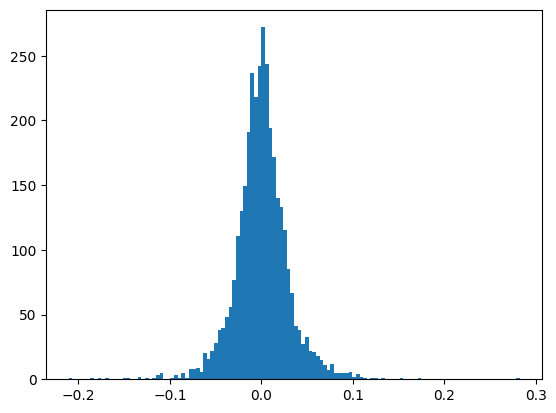

In [50]:
import matplotlib.pyplot as plt


plt.hist(pct_df['AA'], bins='auto')
    

# Set the title and labels
plt.title(f'Histogram of {column}')
plt.xlabel(column)
plt.ylabel('Frequency')
plt.figure(figsize=(2,2))

# Display the histogram
plt.show()

<h1> Let's look at slightly more mature stocks and ones without so much volitility. With lower volume, returns may be more unpredictable as there is not enough sentiment-related trading activity </h1>

In [51]:
SS_list = SS[(SS['count'] > 400) & (SS['std'] <= .05)].index

In [52]:
SS_df = pct_df[SS_list]

In [54]:
SS_df

,A,AA,AAL,AAON,AAP,AAPL_y,ABB,ABBV,ABC,ABEV,...,YUMC,Z,ZBH,ZBRA,ZG,ZI,ZM,ZS,ZTO,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,-0.010863,-0.031231,0.113208,-0.029015,-0.005944,0.001729,0.006619,NaN,-0.007135,-0.006889,...,NaN,NaN,0.031656,-0.001744,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,-0.003553,0.052077,-0.041431,-0.039670,0.008720,-0.015906,0.011634,NaN,-0.009455,0.005370,...,NaN,NaN,-0.000323,-0.007687,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,-0.001297,-0.021214,0.029469,0.037017,-0.000247,-0.001849,0.008500,NaN,-0.016037,-0.003895,...,NaN,NaN,0.022940,-0.025000,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,-0.000325,0.024684,-0.019084,0.011899,0.003953,0.006648,0.028260,NaN,0.010865,0.015864,...,NaN,NaN,-0.021004,-0.003250,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-20,-0.024519,-0.039304,-0.009709,0.012944,-0.017914,0.000487,-0.021794,-0.005915,0.008087,0.006472,...,-0.022391,0.025493,-0.003053,-0.017174,0.023601,-0.011931,0.007137,-0.034738,-0.059723,-0.010718
2023-06-21,0.001439,0.020164,-0.001226,0.031018,0.010886,-0.005675,-0.002591,-0.006966,0.007263,0.025724,...,-0.004822,0.017548,-0.005360,-0.024032,0.015158,-0.095472,-0.051446,-0.025629,-0.008908,0.005743
2023-06-22,0.002958,-0.042968,0.003681,-0.028286,-0.010914,0.016525,-0.003117,0.004019,0.010978,0.009404,...,-0.007268,0.002053,0.011827,-0.010964,0.003155,0.012516,0.007769,-0.000069,0.002345,0.001648


In [20]:
above_zero = (SS_df.values > 0).sum()

# Count values below zero
below_zero = (SS_df.values < 0).sum()

# Print the results
print("Values above zero:")
print(above_zero)
print("\nValues below zero:")
print(below_zero)

Values above zero:
1698901

Values below zero:
1571699


<h1> Ultimately the test will be --> Are returns the day-after major % drops significantly different from all other population returns? </h1>

In [55]:
Ticker = []
Date = []
ret = []
after_ret = []


for b, c in zip(range(len(SS_df.columns)), SS_df.columns):
    for j,k,l in zip(SS_df.iloc[:,b], SS_df.iloc[1:,b], SS_df.index):
        if j <= -.1:
            ret.append(j)
            after_ret.append(k)
            Date.append(l)
            Ticker.append(c)        

In [56]:
RET_df = pd.DataFrame({'Date': Date, 'Ticker': Ticker, 'Return': ret, 'NextReturn': after_ret})

NameError: name 'column' is not defined

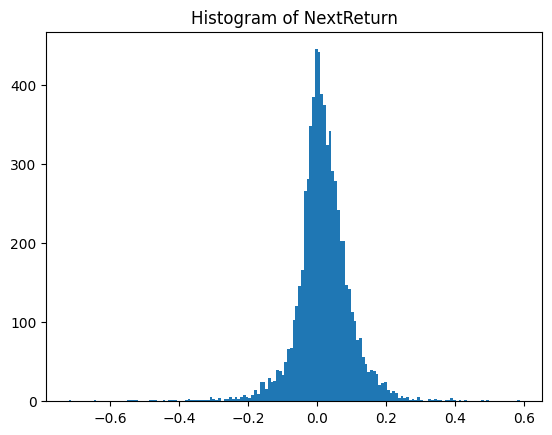

In [57]:
plt.hist(ret_sample, bins='auto')
    
plt.title(f'Histogram of NextReturn')
plt.ylabel('Frequency')
plt.figure(figsize=(2,2))

plt.show()

In [58]:
import numpy as np
from scipy import stats
from scipy.stats import norm

ret_sample = RET_df.NextReturn

population_mean = np.nanmean(SS_df)
population_std = np.nanstd(SS_df)
ret_mean = np.mean(ret_sample)
ret_std = np.std(ret_sample, ddof=1)

n = len(ret_sample)
z = (ret_mean - population_mean) / (ret_std / np.sqrt(n))

p_value = 1 - norm.cdf(z)



print("Sample Mean:", ret_mean)
print("Sample Standard Deviation:", ret_std)
print("Population Mean:", population_mean)
print("Population Standard Deviation:", population_std)
print('Z-score', z)
print('P-val', p_value)

Sample Mean: 0.018006143646755526
Sample Standard Deviation: 0.08021307341056262
Population Mean: 0.0006142824531498118
Population Standard Deviation: 0.022291135101057544
Z-score 18.126269131589797
P-val 0.0


<h1> We can reject the null hypothesis that returns are normal and efficient off the back of abnormal events. Let's visualize and further prove. This sample mean is so significant that I believe I might be missing something... </h1>

In [59]:
Viz_df = RET_df.sort_values(by='Date').reset_index()
Viz_df['CumRet'] = (1 + Viz_df.NextReturn).cumprod() - 1

<Axes: >

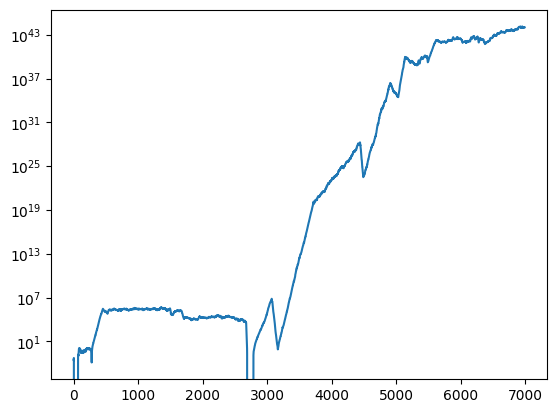

In [60]:
Viz_df['CumRet'].plot(x='Date', y='CumRet',logy=True)

<h1> Let's smooth out the portfolio return by investing only 1/5th in each return that is flagged </h1>

In [61]:
Viz_df['CumRet5'] = (1 + (Viz_df.NextReturn / 5)).cumprod() - 1

<Axes: >

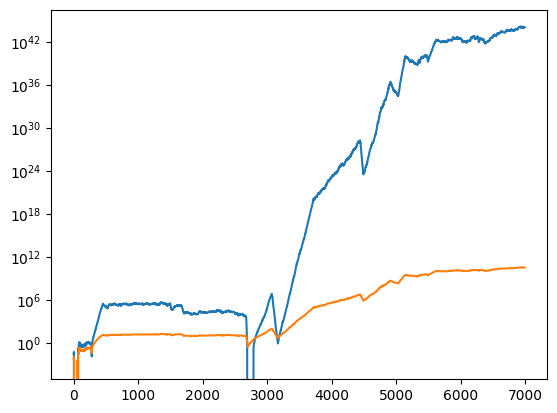

In [62]:
Viz_df['CumRet'].plot(x='Date', y='CumRet',logy=True)
Viz_df['CumRet5'].plot(x='Date', y='CumRet',logy=True)

<h1> Since the start of 2023? </h1>

<Axes: >

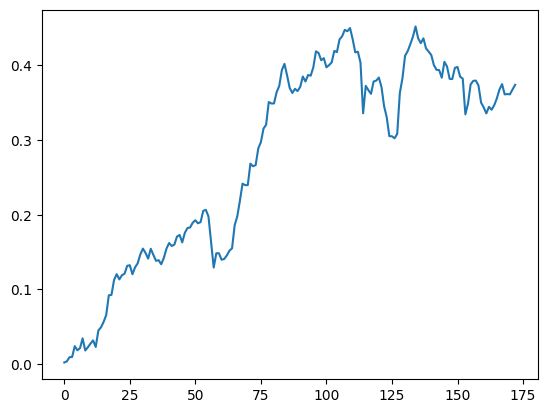

In [63]:
Viz_df2023 = RET_df[RET_df['Date'] > '2023-01-01'].sort_values(by='Date').reset_index()
Viz_df2023['CumRet'] = (1 + Viz_df2023.NextReturn / 4).cumprod() - 1
Viz_df2023['CumRet'].plot()


<h1> Lets loop over the last 40/50 quarters and see the z-scores for these returns and if the strategy outperformed or underperformed the market </h1>

In [82]:
import numpy as np
from scipy import stats
from scipy.stats import norm
import datetime

current_year = datetime.datetime.now().year
start_year = 2010

quarters = []

for year in range(start_year, current_year + 1):
    for quarter in range(1, 5):
        quarter_start = datetime.datetime(year, (quarter - 1) * 3 + 1, 1)
        quarters.append(quarter_start)


quarters = [str(i) for i in quarters]
SS_df.index = SS_df.index

i_quarter = []
i_sample_m = []
i_sample_std = []
i_pop_m = []
i_pop_std = []
i_zscore = []
i_pval = []
i_SP_m = []

SP500 = yf.download("^GSPC").Close
SP500 = pd.DataFrame(SP500.pct_change())


for i,j in zip(quarters, quarters[1:]):
    SS_df2 = SS_df[(SS_df.index > i) & (SS_df.index < j)]
    Viz_df2 = Viz_df[(Viz_df.Date > i) & (Viz_df.Date < j)]
    
    
    SP5002 = SP500[(SP500.index > i) & (SP500.index < j)]
    SP_m = np.nanmean(SP5002)
    
    population_mean2 = np.nanmean(SS_df2)
    population_std2 = np.nanstd(SS_df2)
    ret_mean2 = np.mean(Viz_df2.NextReturn)
    ret_std2 = np.std(Viz_df2.NextReturn, ddof=1)

    n2 = len(Viz_df2.NextReturn)
    z2 = (ret_mean2 - population_mean2) / (ret_std2 / np.sqrt(n2))

    p_value2 = round(1 - norm.cdf(z2),3)


    i_quarter.append(i)
    i_sample_m.append(ret_mean2)
    i_sample_std.append(ret_std2)
    i_pop_m.append(population_mean2)
    i_pop_std.append(population_std2)
    i_zscore.append(z2)
    i_pval.append(p_value2)
    i_SP_m.append(SP_m)

df = pd.DataFrame({'date': i_quarter, 's_mean': i_sample_m, 's_std':i_sample_std
            , 'pop_mean': i_pop_m, 'pop_std': i_pop_std,
            'z': i_zscore, 'p': i_pval, 'SP500': i_SP_m})

df['Perform'] = np.where(df.s_mean > df.SP500, 'Outperform', 'Underperform')

[*********************100%***********************]  1 of 1 completed


/var/folders/v8/l9k84q0j5dvb69nc7wjtd5x80000gn/T/ipykernel_19399/86986424.py:39: RuntimeWarning: Mean of empty slice
  SP_m = np.nanmean(SP5002)
/var/folders/v8/l9k84q0j5dvb69nc7wjtd5x80000gn/T/ipykernel_19399/86986424.py:41: RuntimeWarning: Mean of empty slice
  population_mean2 = np.nanmean(SS_df2)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


In [87]:
df.Perform.value_counts()

Perform
Outperform      34
Underperform    21
Name: count, dtype: int64

In [99]:
df['sample_ret'] = round(df.s_mean * 90 * 100, 2)
df['SP_ret'] = round(df.SP500 * 90 * 100, 2)

<Axes: >

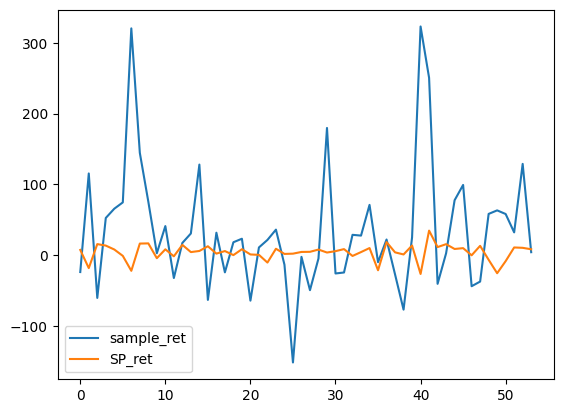

In [108]:
df[['sample_ret', 'SP_ret']].plot()

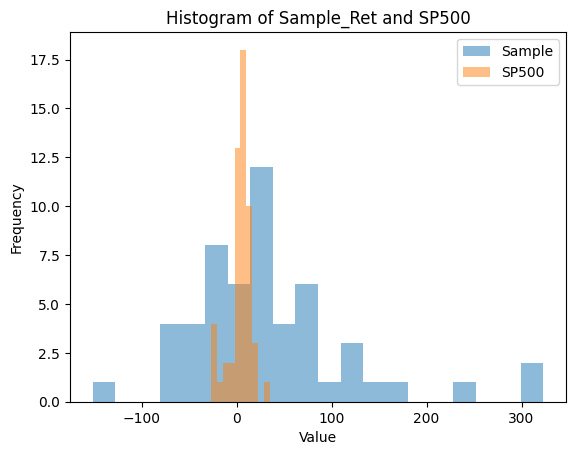

In [114]:
plt.hist(df.sample_ret, bins=20, alpha=0.5, label='Sample')
plt.hist(df.SP_ret, alpha=0.5, label='SP500')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Sample_Ret and SP500')
plt.legend()

# Display the plot
plt.show()

In [116]:
df.sample_ret.skew()

1.403693960724069

<h1> Let's explore more slices of this strategy, maybe we will extend the investing period to 2-3 days after an adverse return. We can also look at bigger cap versus smaller cap. we can also make add sentiment analysis to each quarter based on news stories, or general volitility </h1>

In [134]:
Ticker2 = []
Date2 = []
ret2 = []
after_ret2 = []
after_after_ret = []


for b, c in zip(range(len(SS_df.columns)), SS_df.columns):
    for j,k,l,m in zip(SS_df.iloc[:,b], SS_df.iloc[1:,b], SS_df.index, SS_df.iloc[2:,b]):
        if j <= -.1:
            ret2.append(j)
            after_ret2.append(k)
            Date2.append(l)
            Ticker2.append(c) 
            after_after_ret.append(m)
            
RET2_df = pd.DataFrame({'Date': Date2, 'Ticker': Ticker2, 'Return': ret2, 'NextReturn': after_ret, 'NextNextReturn': after_after_ret})

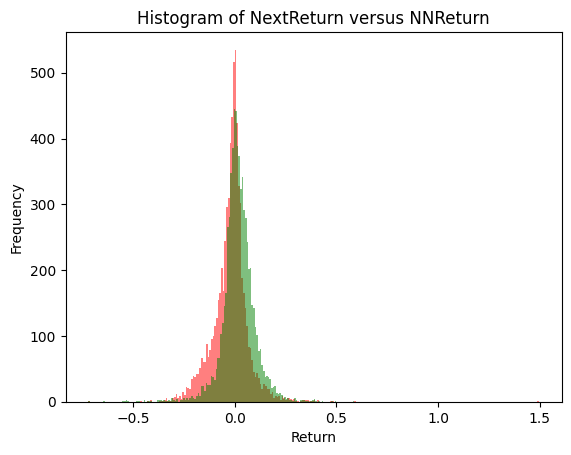

<Figure size 200x200 with 0 Axes>

In [135]:
plt.hist(RET2_df.NextNextReturn, bins='auto', alpha=.5, color='red')
plt.hist(RET2_df.NextReturn, bins='auto', alpha=.5, color='green')
    
plt.title(f'Histogram of NextReturn versus NNReturn')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.figure(figsize=(2,2))

plt.show()

<h1> Cap separation... Companies more established and over 50BN in market cap. Do they have more stable day-after return behavior? </h1>

In [154]:
exclude = ['AAPL', 'BRK/A', 'BRK/B', 'FISV', 'PDD']

cap50 = tickers[(tickers['Market Cap'] > 5e+10)].Symbol.to_list()

In [155]:
cap50 = [i for i in cap50 if i not in exclude]

In [159]:
SS_df_50 = SS_df[cap50]

Ticker50 = []
Date50 = []
ret50 = []
after_ret50 = []



for b, c in zip(range(len(SS_df_50.columns)), SS_df_50.columns):
    for j,k,l in zip(SS_df_50.iloc[:,b], SS_df_50.iloc[1:,b], SS_df_50.index):
        if j <= -.1:
            ret50.append(j)
            after_ret50.append(k)
            Date50.append(l)
            Ticker50.append(c) 

RET50_df = pd.DataFrame({'Date': Date50, 'Ticker': Ticker50, 'Return': ret50, 'NextReturn': after_ret50})

In [167]:
RET50_df.NextReturn.mean()

0.026536228461814793

In [166]:
RET_df.NextReturn.mean()

0.018006143646755526

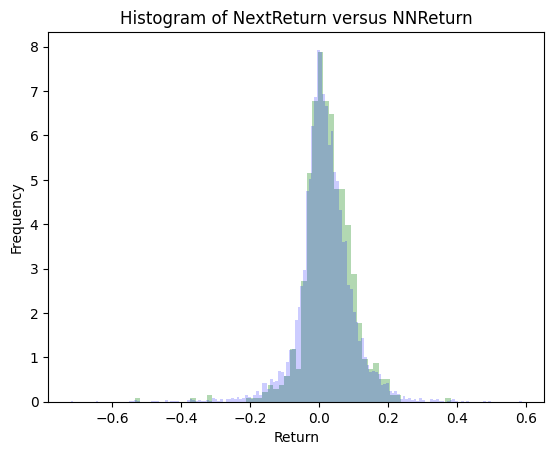

<Figure size 1200x1200 with 0 Axes>

In [186]:
plt.hist(RET50_df.NextReturn, bins='auto', alpha=.3, color='green', density=True)
plt.hist(RET_df.NextReturn, bins='auto', alpha=.2, color='blue', density=True)   
plt.title(f'Histogram of NextReturn versus NNReturn')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.figure(figsize=(12,12))

plt.show()

<h1> It seems that isolating comapnies >50BN cap takes out some variance, and also creates a better return and profile </h1>

In [193]:
current_year = datetime.datetime.now().year
start_year = 2010

quarters = []

for year in range(start_year, current_year + 1):
    for quarter in range(1, 5):
        quarter_start = datetime.datetime(year, (quarter - 1) * 3 + 1, 1)
        quarters.append(quarter_start)


quarters = [str(i) for i in quarters]
SS_df.index = SS_df.index

i_quarter = []
i_sample_m = []
i_sample_std = []
i_pop_m = []
i_pop_std = []
i_zscore = []
i_pval = []
i_SP_m = []

SP500 = yf.download("^GSPC").Close
SP500 = pd.DataFrame(SP500.pct_change())


for i,j in zip(quarters, quarters[1:]):
    SS_df2 = SS_df_50[(SS_df_50.index > i) & (SS_df_50.index < j)]
    Viz_df2 = RET50_df[(RET50_df.Date > i) & (RET50_df.Date < j)]
    
    
    SP5002 = SP500[(SP500.index > i) & (SP500.index < j)]
    SP_m = np.nanmean(SP5002)
    
    population_mean2 = np.nanmean(SS_df2)
    population_std2 = np.nanstd(SS_df2)
    ret_mean2 = np.mean(Viz_df2.NextReturn)
    ret_std2 = np.std(Viz_df2.NextReturn, ddof=1)

    n2 = len(Viz_df2.NextReturn)
    z2 = (ret_mean2 - population_mean2) / (ret_std2 / np.sqrt(n2))

    p_value2 = round(1 - norm.cdf(z2),3)


    i_quarter.append(i)
    i_sample_m.append(ret_mean2)
    i_sample_std.append(ret_std2)
    i_pop_m.append(population_mean2)
    i_pop_std.append(population_std2)
    i_zscore.append(z2)
    i_pval.append(p_value2)
    i_SP_m.append(SP_m)

df = pd.DataFrame({'date': i_quarter, 's_mean': i_sample_m, 's_std':i_sample_std
            , 'pop_mean': i_pop_m, 'pop_std': i_pop_std,
            'z': i_zscore, 'p': i_pval, 'SP500': i_SP_m})

df['Perform'] = np.where(df.s_mean > df.SP500, 'Outperform', 'Underperform')

[*********************100%***********************]  1 of 1 completed


/var/folders/v8/l9k84q0j5dvb69nc7wjtd5x80000gn/T/ipykernel_19399/875970174.py:34: RuntimeWarning: Mean of empty slice
  SP_m = np.nanmean(SP5002)
/var/folders/v8/l9k84q0j5dvb69nc7wjtd5x80000gn/T/ipykernel_19399/875970174.py:36: RuntimeWarning: Mean of empty slice
  population_mean2 = np.nanmean(SS_df2)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


In [231]:

RET50_df_plot['CumRet'] = (1 + RET50_df_plot.NextReturn).cumprod() - 1


In [244]:
RET50_df_plot = RET50_df.sort_values(by='Date').reset_index()
RET50_df_plot = RET50_df_plot[RET50_df_plot.Date > '2023-01-01']
RET50_df_plot['CumRet'] = (1 + RET50_df_plot.NextReturn).cumprod() - 1

<Axes: >

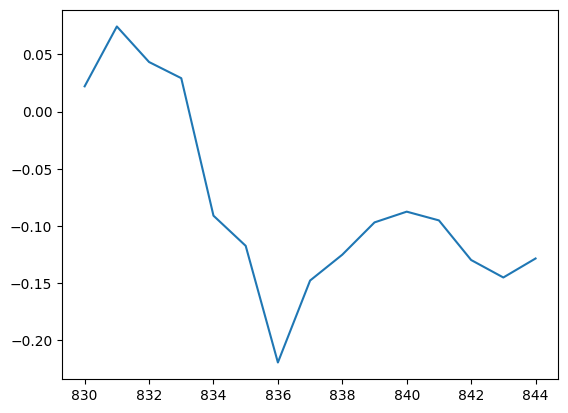

In [245]:
RET50_df_plot['CumRet'].plot()

In [248]:
df.sort_values(by='pop_std', ascending=False)

,date,s_mean,s_std,pop_mean,pop_std,z,p,SP500,Perform
40,2020-01-01 00:00:00,0.052730,0.080961,-0.002917,0.045089,13.556170,0.000,-0.002953,Outperform
41,2020-04-01 00:00:00,0.029673,0.070588,0.003917,0.030247,1.548032,0.061,0.003852,Outperform
6,2011-07-01 00:00:00,0.025668,0.066076,-0.002681,0.027341,2.845943,0.002,-0.002459,Outperform
49,2022-04-01 00:00:00,0.001695,0.041722,-0.002285,0.025551,0.522409,0.301,-0.002837,Outperform
48,2022-01-01 00:00:00,-0.002010,0.055478,-0.000087,0.024550,-0.147023,0.558,-0.000728,Underperform
7,2011-10-01 00:00:00,0.013790,0.027117,0.001784,0.024373,1.328275,0.092,0.001819,Outperform
24,2016-01-01 00:00:00,-0.010828,0.060106,0.000384,0.023056,-0.646182,0.741,0.000193,Underperform
51,2022-10-01 00:00:00,0.011249,0.027457,0.002104,0.022918,1.332135,0.091,0.001208,Outperform
35,2018-10-01 00:00:00,-0.008576,0.054822,-0.002044,0.022061,-0.461448,0.678,-0.002371,Underperform
1,2010-04-01 00:00:00,0.034244,0.050454,-0.001835,0.021972,2.022555,0.022,-0.002031,Outperform


<h1> This says that this strategy is effective overall, but very dependent on when you start investing as only 50% of quarters outperform the SP500. Even less are statistically significant... </h1>